<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [164]:
# Installing the libraries with the specified version.
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [165]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, AdamW
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [166]:
# uncomment and run the following lines in case Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
ds = pd.read_csv("/content/drive/My Drive/aa-project-8-a/bank-project/Churn.csv")    # complete the code to load the dataset

## Data Overview

### View the first and last 5 rows of the dataset.

In [168]:
# let's view the first 5 rows of the data
ds.head() ##  Complete the code to view top 5 rows of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [169]:
# let's view the last 5 rows of the data
ds.tail() ##  Complete the code to view last 5 rows of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [170]:
# Checking the number of rows and columns in the training data
ds.shape ##  Complete the code to view dimensions of the train data

(10000, 14)

### Check the data types of the columns for the dataset

In [171]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the Statistical Summary

In [172]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [173]:
# let's check for missing values in the data
ds.isnull().sum() ##  Complete the code to check missing entries in the train data

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Checking for unique values for each of the column

In [174]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [175]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [176]:
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

### Univariate Analysis

In [177]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [178]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

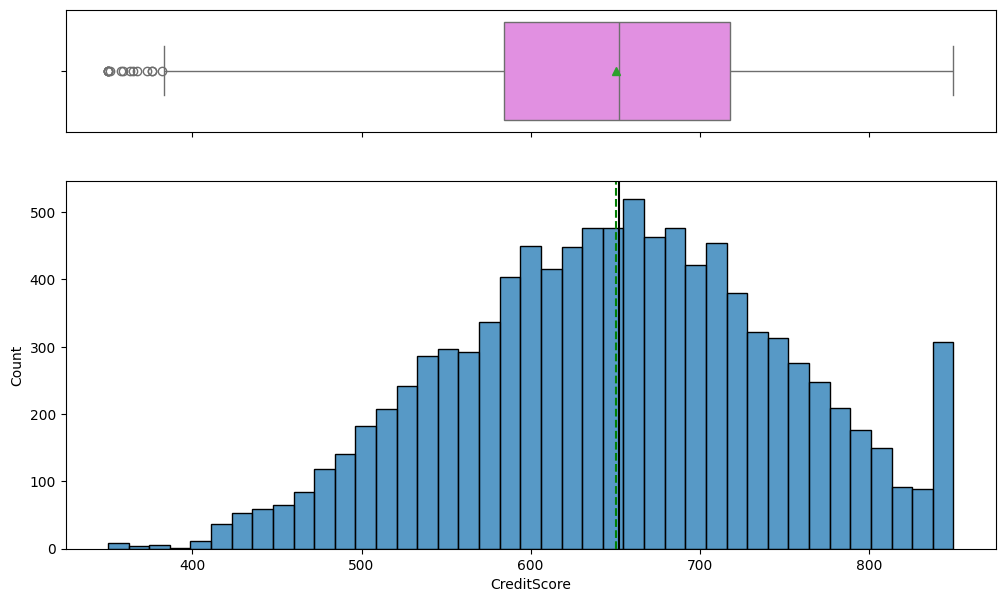

In [179]:
histogram_boxplot(ds,'CreditScore')

Observations:

* The CreditScores are generally clustered around 650, which represents the middle point of the data.

* * The scores range from 590 to 710 for the middle 50% of the data, indicating a moderate spread in the central data.

* The presence of a low outlier at 390 suggests a significantly low CreditScore compared to the rest of the data.

* There is no high outlier, meaning that the upper range of CreditScores does not deviate significantly from the rest of the data.

These observations suggest that most of the CreditScores fall within a moderate range, but there is at least one unusually low score in the dataset.

#### Observations on Age

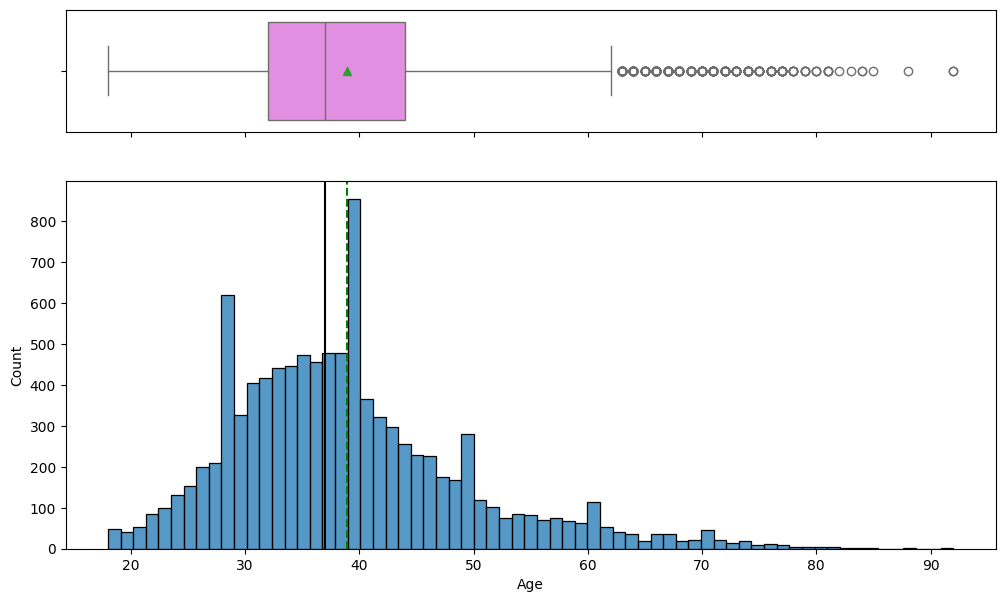

In [180]:
histogram_boxplot(ds,'Age')

Observations:

* The median age of 30.7 suggests that the age distribution is slightly skewed towards younger individuals, with most ages falling below the median.

* The IQR of 10 years, from 32 to 42, shows that the middle 50% of ages are within a relatively narrow range, indicating moderate variability in this age group.

* The absence of low outliers implies that the younger individuals do not significantly deviate from the rest of the data.

* The presence of high outliers beyond 60 suggests that a small number of individuals are considerably older than the typical age range.

In summary, the data indicates a fairly concentrated age range around the median, with the notable exception of a few significantly older individuals who are outliers.

#### Observations on Balance

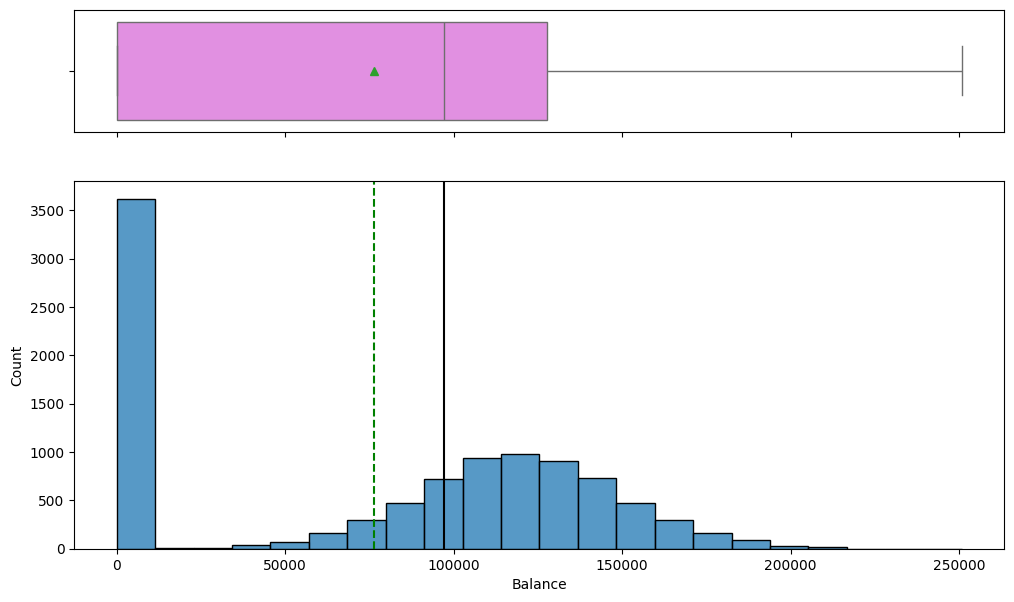

In [181]:
histogram_boxplot(ds,'Balance')

Observations:

* The median balance of 70,000 suggests that half of the individuals maintain a relatively high balance compared to those with very low or zero balances.

* A Q1 of 0 indicates that 25% of the individuals have a balance of 0, showing a substantial portion of the population with no account balance.

* The IQR of 120,000 reflects a wide variability in account balances, with the middle 50% of the data covering a broad range from 0 to 120,000.

* The absence of outliers suggests that the balance data is generally well-distributed within the range and lacks extreme high or low values.

* The 3,500 individuals with a balance of 0 represent a notable subset of the population, potentially indicating a significant number of accounts with no financial activity.

In summary, while the overall balance distribution shows a wide range, a large number of individuals have no balance, and the data does not feature any extreme outliers. This suggests that the balance distribution is influenced by a mix of individuals with no balance and those with moderate to high balances.

#### Observations on Estimated Salary

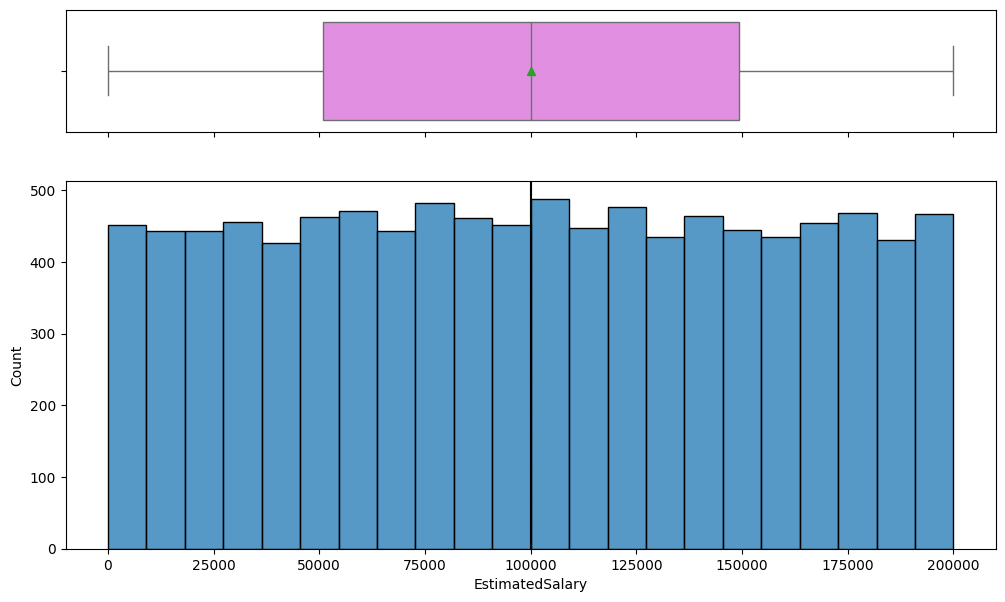

In [182]:
histogram_boxplot(ds,'EstimatedSalary')

Observations:

* The median salary of 100,000 indicates that the typical individual earns around this amount, with half of the population earning more and half earning less.

* The IQR of 90,000, from 50,000 to 140,000, shows a wide range of salaries within the middle 50% of the population, indicating significant variability in income.

* The absence of low or high outliers suggests that the salary distribution is fairly consistent, with no unusually high or low salaries in the dataset.

* The lower 25% of individuals earn 50,000 or less, while the upper 25% earn 140,000 or more, highlighting the income spread in the dataset.

In summary, the data reflects a broad salary distribution, with most individuals earning between 50,000 and 140,000, and the median salary at 100,000. The lack of outliers suggests that all salary values fall within a typical range.

#### Observations on Exited

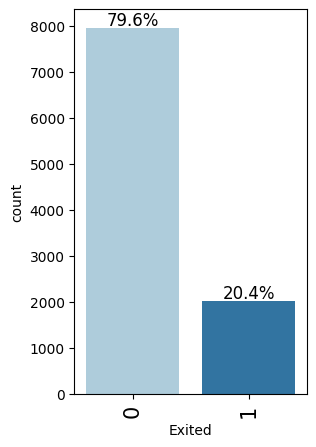

In [183]:
labeled_barplot(ds, "Exited", perc=True)

Observations:

* The majority of individuals, 79.6%, have not exited (Exited 0), indicating that most people are retained.

* A smaller portion, 20.4%, have exited (Exited 1), suggesting that only a minority of individuals have left.

* The data shows a clear imbalance between the two groups, with significantly more individuals staying (80%) than exiting (20%).

In summary, the population largely remains with the service or organization, with only a small percentage choosing to exit. This retention rate indicates a relatively stable customer base.

#### Observations on Geography

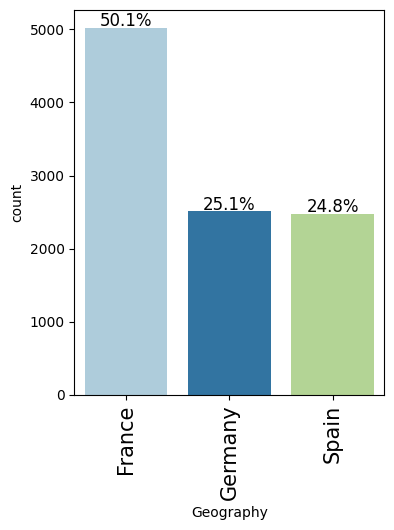

In [184]:
labeled_barplot(ds, "Geography", perc=True)

Observations:

* France has the highest representation among the three countries, with 50.1% of individuals coming from France, indicating a strong majority.

* Germany and Spain both have equal counts of 2,500 individuals, representing 25.1% and 24.8%, respectively. This shows a slight edge for Germany, but the numbers are virtually identical.

* The data indicates a clear dominance of France in this dataset, with more than half of the individuals located there, while Germany and Spain have similar and significantly lower representations.

In summary, the population is primarily composed of individuals from France, with Germany and Spain accounting for roughly equal, smaller portions of the total population.

#### Observations on Gender

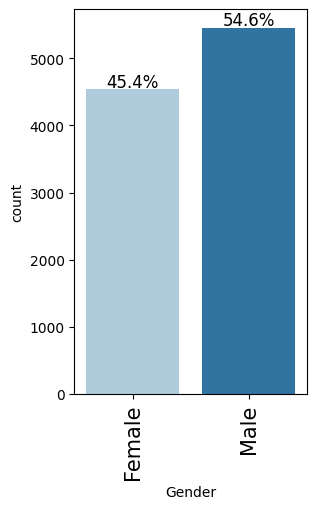

In [185]:
labeled_barplot(ds, "Gender", perc=True)

Observations:

* Male individuals represent the majority of the population with 54.6%, totaling 5,500 individuals.

* Female individuals account for a smaller portion of the population at 45.4%, with a count of 4,500.

* The data shows a slight gender imbalance, with more males than females in the population.

* The difference between the two groups is notable, with males exceeding females by 1,000 individuals.

In summary, the population is predominantly male, with females making up a significant but lesser portion. The gender distribution suggests a relatively balanced population, albeit slightly skewed towards males.

#### Observations on Tenure

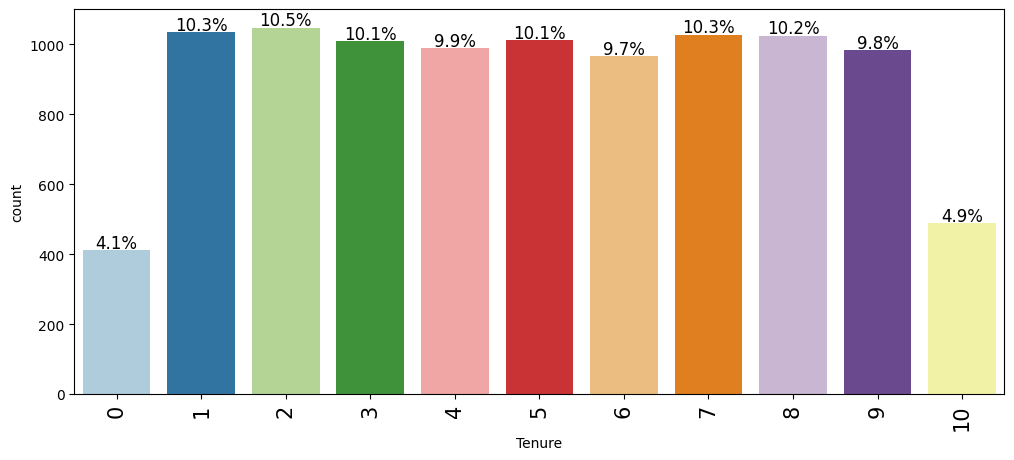

In [186]:
labeled_barplot(ds, "Tenure", perc=True)

Observations:

* Distribution of Tenure: The tenure distribution shows a relatively even spread among individuals, particularly between 1 to 9 months, with percentages ranging from 9.7% to 10.5%.

* Highest Tenure: The highest percentage is observed at 2 months with 10.5%, closely followed by 1 month at 10.3% and 7 months also at 10.3%.

* Lowest Tenure: The lowest percentages are seen at the extremes: 0 months with 4.1% and 10 months with 4.9%, indicating that very few individuals have either just started or have reached the maximum tenure.

* Middle Range Stability: The tenure values between 3 months to 9 months hover around 10%, suggesting a stable retention rate within this range.

* No Extreme Peaks: The data does not show any extreme peaks or troughs, indicating a balanced distribution of tenure across the population.

In summary, the tenure data reflects a fairly uniform distribution, with the majority of individuals having tenures between 1 to 9 months, while very few are at the beginning or the end of the tenure scale. This suggests a moderate level of retention among individuals in this dataset.

#### Observations on Number of Products

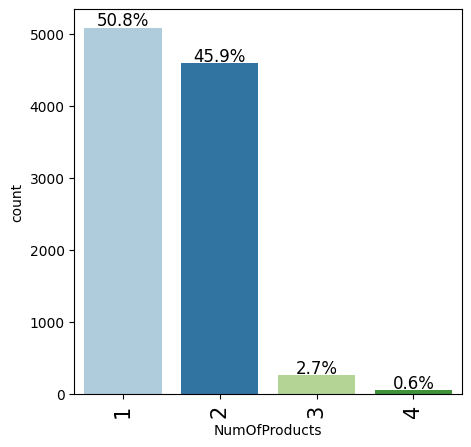

In [187]:
labeled_barplot(ds, "NumOfProducts", perc=True)

Observations:

* Dominance of One Product: A significant majority of individuals, 50.8%, use 1 product, indicating that this is the most common scenario in the population.

* Two Products: Close to half, 45.9%, have 2 products, showing that most individuals are using one or two products overall. The data suggests that the adoption of additional products is relatively high among users.

* Minimal Adoption of More Products: The percentages for 3 products (2.7%) and 4 products (0.6%) are very low, indicating that very few individuals utilize three or more products.

* Sharp Decline: There is a sharp decline in the percentage of individuals as the number of products increases, reflecting a trend where most users prefer only one or two products.

* Implications for Marketing: The data suggests a potential opportunity for marketing strategies aimed at encouraging users of one or two products to consider adding additional products, as the uptake of three or more products is currently very low.

In summary, the data shows a strong preference for using one or two products, with a substantial drop-off for those using three or four products. This indicates a focused user base that primarily engages with a limited number of offerings.

#### Observations on Has Credit Card

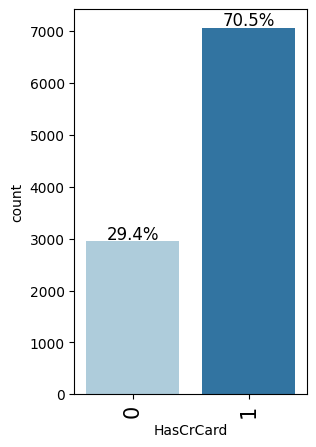

In [188]:
labeled_barplot(ds, "HasCrCard", perc=True)

Observations:

* Majority with Credit Cards: A significant majority of individuals, 70.5%, have a credit card, indicating a strong prevalence of credit card ownership within the population.

* Minority without Credit Cards: Only 29.4% of individuals do not have a credit card, highlighting that credit card ownership is common among the majority of the population.

* Implications for Financial Services: The high percentage of credit card holders suggests that financial services, marketing strategies, and promotional offers can be effectively targeted toward this group, as they represent a key segment of the market.

* Potential for Growth: With nearly 30% of individuals not having a credit card, there exists an opportunity for financial institutions to engage and educate this segment about the benefits of credit card usage.

In summary, the data reflects a strong inclination towards credit card ownership among individuals, with a substantial majority possessing one. This presents opportunities for targeted marketing and financial engagement strategies.

#### Observations on Is Active Member

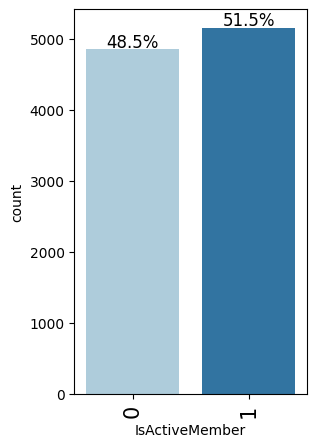

In [189]:
labeled_barplot(ds, "IsActiveMember", perc=True)

Observations:

* Slight Majority of Active Members: A narrow majority of 51.5% are classified as active members, indicating that just over half of the individuals are currently engaged with the organization or service.

* Near Balance: The percentages for active (1) and inactive (0) members are very close, with only a 3% difference, reflecting a relatively balanced membership status within the population.

* Retention Focus: With nearly half of the population being inactive members (48.5%), there may be opportunities to improve retention strategies and re-engagement initiatives to convert these individuals into active members.

* Engagement Strategies: The data suggests that targeted engagement strategies could be beneficial, focusing on converting inactive members into active participants, thereby enhancing overall membership engagement and loyalty.

In summary, the data presents a nearly equal split between active and inactive members, with a slight lean towards active membership. This indicates a stable membership base, but also highlights the potential for improving engagement with those who are currently inactive.

### Bivariate Analysis

In [190]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [191]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

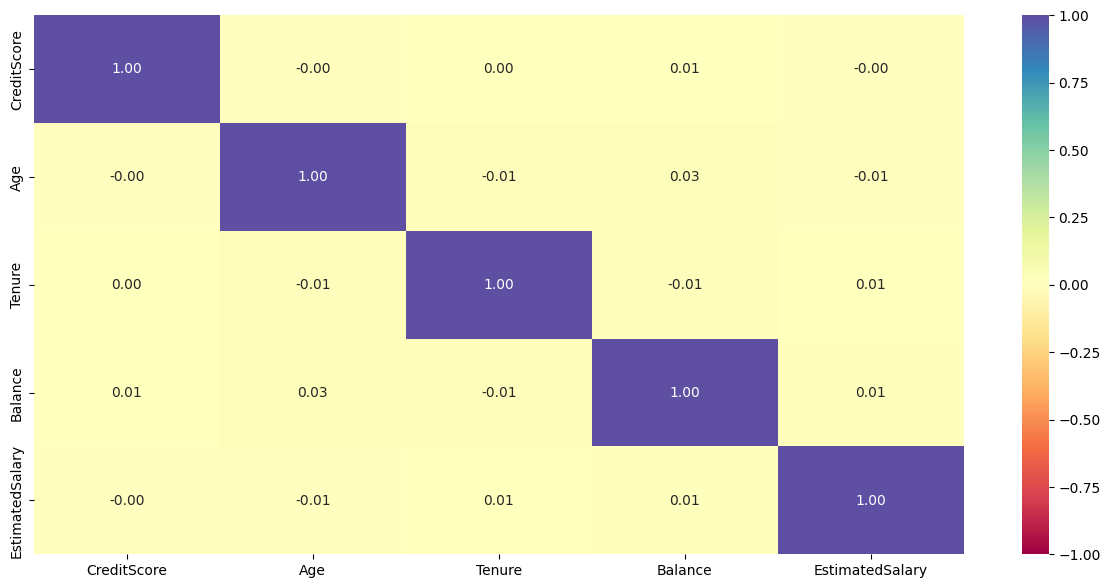

In [192]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


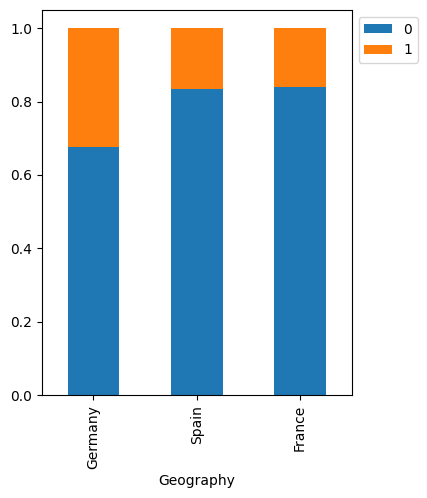

In [193]:
stacked_barplot(ds, "Geography", "Exited" )

Observations:

* Overall Retention Rate: The majority of individuals across all geographies (79.6%) have not exited, suggesting a strong retention rate overall.

Geographic Distribution:

* France has the highest number of individuals (5,014), with a substantial portion (4,204) remaining active, accounting for 52.9% of the total population.

* Germany, with 2,509 individuals, has a slightly lower total than France but a higher exit rate, with 32.4% (814) of its members having exited.

Exit Rates:

* The exit rate for Germany is higher at 32.4%, compared to France at 16%. This suggests that individuals in Germany are more likely to exit compared to those in France.

Potential Focus Areas:

* With 814 individuals exiting in Germany, targeted retention strategies could be particularly beneficial in this market to reduce the exit rate.

* In contrast, France's relatively low exit rate suggests that current retention strategies might be effective, but ongoing engagement efforts should continue to maintain this positive trend.

Overall Analysis: The data indicates a stronger retention trend in France compared to Germany, highlighting the need for specific strategies tailored to each geographical market to improve overall customer retention.

In summary, while the overall retention is robust across both countries, the higher exit rate in Germany compared to France suggests opportunities for improvement in customer engagement and retention strategies tailored to local preferences and needs.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


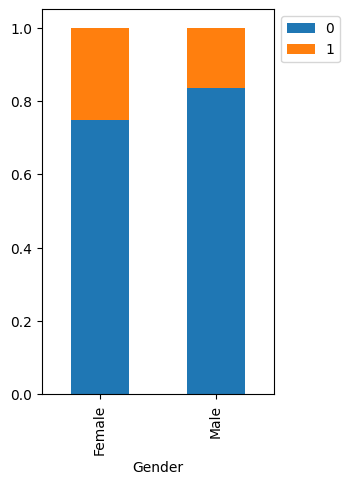

In [194]:
stacked_barplot(ds, "Gender", "Exited" )

Observations:

* Overall Retention Rate: The majority of individuals across all genders (79.6%) have not exited, indicating strong overall retention.

Gender Distribution:

* The population is relatively balanced between genders, with 5,457 males (54.6%) and 4,543 females (45.4%).

Exit Rates:

* Among females, 25% (1,139) have exited, while among males, the exit rate is lower at 16.4% (898). This indicates that females are more likely to exit compared to males.

Potential Focus Areas:

* The higher exit rate among females suggests a need for targeted retention strategies aimed at addressing their specific concerns or preferences.

* The male segment has a lower exit rate, but strategies to enhance engagement could still further improve retention within this group.

Overall Analysis: The data reveals that while retention is generally strong, there is a notable gender difference in exit rates, with females exhibiting a higher tendency to exit. This highlights the potential for gender-specific engagement and retention strategies.

In summary, the overall retention is robust, but the higher exit rate among females compared to males suggests an opportunity for targeted efforts to enhance satisfaction and reduce exits in that demographic.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


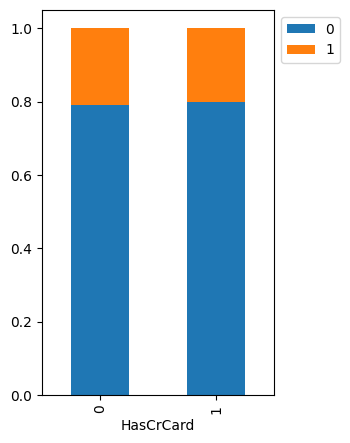

In [195]:
stacked_barplot(ds, "HasCrCard", "Exited" )

Observations:

* Overall Retention Rate: The majority of the population (79.6%) have not exited, indicating a solid retention trend across both segments.

Credit Card Ownership:

* A significant portion of the population (70.5%) holds a credit card, with 5,631 individuals not exiting.

* Among those with credit cards, the exit rate is 20.2% (1,424), which is slightly higher than the overall average.

Non-Credit Card Holders:

* Individuals without a credit card make up 29.5% of the population, and they exhibit a higher exit rate of 20.8% (613).

Comparative Exit Rates:

* The exit rate among credit card holders (20.2%) is marginally lower than that of non-holders (20.8%), suggesting that credit card ownership does not significantly impact the likelihood of exiting.

Potential Focus Areas:

* With both segments showing similar exit rates, retention strategies could benefit from focusing on addressing the needs of both credit card holders and non-holders to improve overall engagement.

* Special attention may be required for non-credit card holders, who exhibit a higher exit tendency, to understand their reasons for leaving and how to better serve their needs.

In summary, while overall retention is strong, the exit rates for both credit card holders and non-holders are relatively similar, indicating a need for broad retention strategies that cater to the specific concerns of both groups.

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


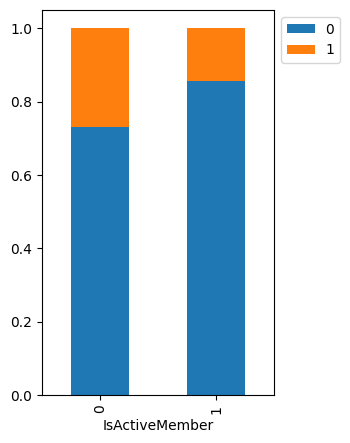

In [196]:
stacked_barplot(ds, "IsActiveMember", "Exited" )

Observations:

* Overall Retention Rate: The retention rate is generally strong, with 79.6% of individuals not exiting, though there is a clear distinction between active and inactive members.

Exit Rate Among Inactive Members:

* Inactive members (0) have a significantly higher exit rate of 26.8% (1,302 out of 4,849), suggesting that a lack of engagement strongly correlates with a higher likelihood of exiting.

Exit Rate Among Active Members:

* Active members (1) have a much lower exit rate of 14.3% (735 out of 5,151), indicating that active engagement plays a key role in customer retention.

Active vs. Inactive Members:

* The active members represent 51.5% of the total population, and their lower exit rate highlights the effectiveness of engagement in reducing churn.

* Inactive members make up 48.5% of the population but contribute disproportionately to exits, with 63.9% (1,302 out of 2,037) of all exits coming from this group.

Retention Focus:

* The data underscores the importance of maintaining active engagement with members. There is a significant opportunity to reduce exits by focusing retention efforts on the inactive members, who are much more likely to leave.

#### Exited Vs Credit Score

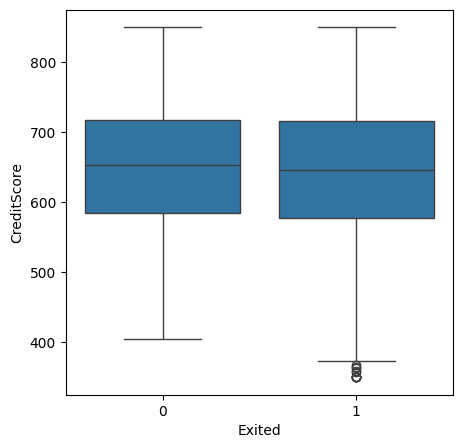

In [197]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

Observations:

Median CreditScore:

* Both customers who did not exit (0) and those who exited (1) have the same median CreditScore of 650. This suggests that credit score does not appear to be a distinguishing factor between those who exit and those who remain.

Distribution Similarity:

* The distribution of CreditScore is similar for both groups, indicating no significant difference in credit scores between customers who exited and those who did not.

No Outliers:

* There are no outliers in the credit score data for either group. This means the credit scores are consistently within a normal range for both exited and non-exited customers.

Conclusion:

* The box plot suggests that CreditScore does not play a critical role in predicting whether a customer will exit, as the median and distribution are the same for both groups. Other factors likely influence the exit decision.

#### Exited Vs Age

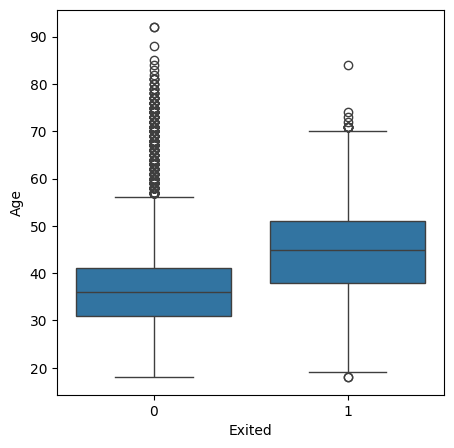

In [198]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Age
plt.show()

Observations:

Median Age:

* Customers who did not exit (0) have a median age of 35.
Customers who exited (1) have a median age of 45.
This indicates that older customers are more likely to exit, as the median age for exited customers is significantly higher.

Outliers:

* For customers who did not exit (0), there are outliers above age 56, suggesting a few older customers in this group are exceptions.
For customers who exited (1), there are outliers above age 70, indicating some older customers in this group as well, but the presence of outliers at a higher age range suggests that older customers may be more likely to exit.

Age Distribution:

* The general trend shows that younger customers (median age 35) are more likely to stay, while older customers (median age 45) are more likely to exit.

* The data suggests age could be a key factor in predicting customer churn, with older customers being more prone to exit.

Conclusion:

* The box plot indicates that older customers are more likely to exit, with a higher median age for exited customers. There are outliers for both groups, but the trend shows a strong relationship between age and the likelihood of exiting. This suggests that retention strategies might need to be focused on older customers to reduce churn.

#### Exited Vs Tenure

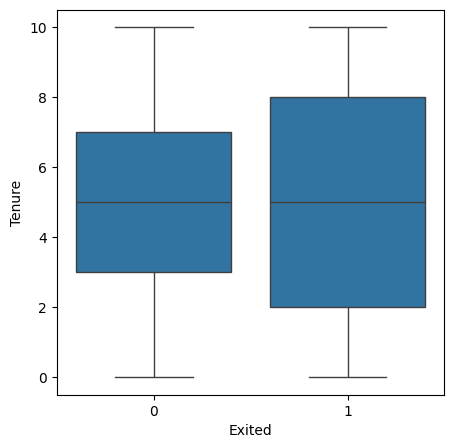

In [199]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)             ## Complete the code to plot the boxplot for Exited and Tenure
plt.show()

Observations:

Median Tenure:

* The median tenure for both customers who did not exit (0) and those who exited (1) is 5 years. This suggests that tenure length alone does not strongly differentiate between customers who exit and those who remain.

Interquartile Range (IQR):

* For non-exited (0) customers, the 1st quartile (Q1) is 3.1 years and the 3rd quartile (Q3) is 7 years, indicating that 50% of non-exited customers have tenures between 3.1 and 7 years.

* For exited (1) customers, the 1st quartile (Q1) is 2 years and the 3rd quartile (Q3) is 8 years, indicating that 50% of exited customers have tenures between 2 and 8 years.

* The wider IQR for exited customers (2 to 8 years) suggests more variability in their tenure compared to non-exited customers.

No Outliers:

* There are no outliers in tenure for either group, meaning the tenure distribution is fairly consistent for both exited and non-exited customers.

Tenure Differences:

* While the median tenure is the same for both groups, the slightly lower Q1 for exited customers (2 years) suggests that customers with shorter tenures are more likely to exit.

* The wider range in the exited group (Q1=2, Q3=8) shows that customers exit at various points during their tenure, though a significant portion exits within the earlier years.

#### Exited Vs Balance

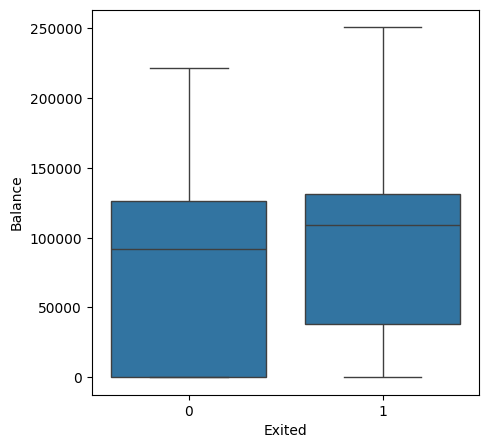

In [200]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Balance
plt.show()

Observations:

Median Balance:

* Customers who did not exit (0) have a median balance (Q2) of 90,000.
Customers who exited (1) have a higher median balance of 120,000.
This suggests that customers with higher balances are more likely to exit.

Interquartile Range (IQR):

* For non-exited (0) customers, the 1st quartile (Q1) is 0 and the 3rd quartile (Q3) is 130,000, indicating a wide range of balances, with 25% of non-exited customers having a balance of zero.

* For exited (1) customers, the 1st quartile (Q1) is 50,000 and the 3rd quartile (Q3) is 135,000, meaning that 50% of exited customers have balances between 50,000 and 135,000, reflecting generally higher balances compared to the non-exited group.

No Outliers:

* There are no outliers in the balance data for either group, indicating that the balance distribution is fairly consistent within each group, without extreme values.

Balance Differences:

* The higher median balance for exited customers, along with a higher Q1, suggests that customers with larger balances are more prone to exit.

* The non-exited group includes a significant portion of customers with zero balances (Q1 = 0), while the exited group has a higher minimum balance (Q1 = 50,000), indicating that customers with very low or no balances are less likely to leave.

Conclusion:

* Customers with higher balances are more likely to exit, as reflected by the higher median and Q1 balance in the exited group. The absence of outliers shows that this trend is consistent across both groups. Retention strategies might need to focus on customers with higher balances, who seem more likely to exit.

#### Exited Vs Number of Products

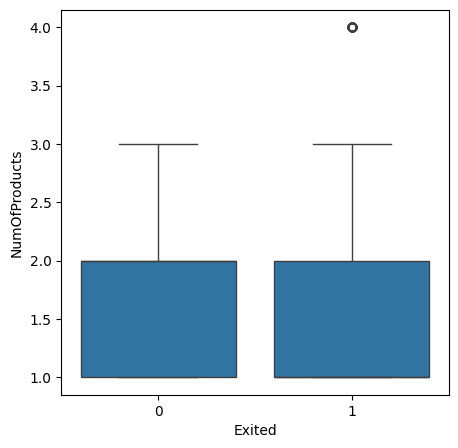

In [201]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)            ## Complete the code to plot the boxplot for Exited and Number of products
plt.show()

Observations:

Interquartile Range (IQR):

* For both customers who did not exit (0) and those who exited (1), the 1st quartile (Q1) is 1 product, and the 3rd quartile (Q3) is 2 products. This indicates that the majority of customers, whether they exited or not, typically have between 1 and 2 products with the bank.

No Outliers:

* There are no outliers in the number of products for either group. This means the data on the number of products is consistently within a normal range for both exited and non-exited customers.

No Significant Difference:

* Since both groups have the same IQR (Q1 = 1, Q3 = 2), there is no significant difference in the number of products between exited and non-exited customers. This suggests that the number of products held by a customer is not a major factor influencing whether they exit.

Conclusion:

* The number of products does not seem to significantly impact whether a customer exits or stays, as both exited and non-exited customers have a similar distribution of 1 to 2 products. Other factors might play a larger role in determining customer churn.

#### Exited Vs Estimated Salary

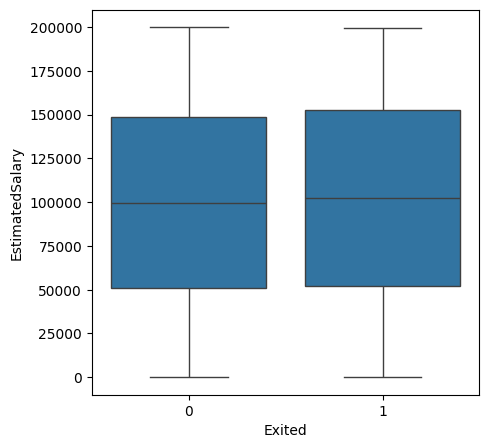

In [202]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

Observations:

Median Salary:

* Both customers who did not exit (0) and those who exited (1) have the same median salary (Q2) of 100,000. This indicates that the median salary is not a differentiating factor between customers who stay and those who exit.

Interquartile Range (IQR):

* For non-exited (0) customers, the 1st quartile (Q1) is 50,000 and the 3rd quartile (Q3) is 150,000, indicating that 50% of non-exited customers have an estimated salary between 50,000 and 150,000.

* For exited (1) customers, the 1st quartile (Q1) is also 50,000, but the 3rd quartile (Q3) is slightly higher at 155,000, indicating a slightly wider salary range for exited customers.

* This small difference in the upper range suggests that exited customers may have slightly higher salaries, though the overall difference is minor.

No Outliers:

* There are no outliers in the salary data for either group, meaning the distribution of salaries is consistent and does not contain extreme values for either exited or non-exited customers.
Similar Salary Distribution:

* Both exited and non-exited customers share a similar salary distribution, with most customers earning between 50,000 and 150,000, and the slight extension in the Q3 for exited customers does not suggest a significant difference.

Conclusion:

* The salary distribution between exited and non-exited customers is very similar, with a median salary of 100,000 for both groups. The slightly higher Q3 for exited customers suggests a minor difference, but overall, estimated salary does not appear to be a strong factor in customer churn. Other variables likely play a more significant role in customer exit behavior.

## Data Preprocessing

### Dummy Variable Creation

In [203]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

In [204]:
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


### Train-validation-test Split

In [205]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [206]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [207]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.5, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [208]:
print(X_train.shape, X_val.shape, X_test.shape)

(4000, 11) (4000, 11) (2000, 11)


In [209]:
print(y_train.shape, y_val.shape, y_test.shape)

(4000,) (4000,) (2000,)


In [210]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8061,477,31,9,0.00,2,0,1,184061.17,0.0,1.0,1.0
1413,503,30,10,136622.55,2,0,0,47310.24,1.0,0.0,1.0
373,802,31,1,125013.72,1,1,1,187658.09,1.0,0.0,1.0
7203,657,33,1,84309.57,2,0,0,103914.40,0.0,0.0,1.0
7504,654,32,2,0.00,1,1,1,51972.92,0.0,1.0,0.0


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [211]:
# creating an instance of the standard scaler
sc = StandardScaler()

cols_list = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
             'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
             'Geography_Germany', 'Geography_Spain', 'Gender_Male']

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])    ## Complete the code to specify the columns to normalize
X_test[cols_list] = sc.transform(X_test[cols_list])    ## Complete the code to specify the columns to normalize

In [212]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8061,-1.804499,-0.754684,1.375144,-1.234708,0.814016,-1.554311,0.966559,1.478227,-0.584664,1.737844,0.905448
1413,-1.536308,-0.849013,1.718759,0.960966,0.814016,-1.554311,-1.034598,-0.906046,1.710385,-0.575426,0.905448
373,1.547892,-0.754684,-1.373770,0.774400,-0.910594,0.643372,0.966559,1.540940,1.710385,-0.575426,0.905448
7203,0.052210,-0.566024,-1.373770,0.120239,0.814016,-1.554311,-1.034598,0.080856,-0.584664,-0.575426,0.905448
7504,0.021264,-0.660354,-1.030156,-1.234708,-0.910594,0.643372,0.966559,-0.824751,-0.584664,1.737844,-1.104426


# Model Building

In [213]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [214]:
train_metric_df = pd.DataFrame(columns=["accuracy"])
valid_metric_df = pd.DataFrame(columns=["accuracy"])

In [215]:
import matplotlib.pyplot as plt

# Function to plot metrics
def plot(history, name):
    """
    Function to plot loss/recall

    history: an object which stores the metrics and losses.
    name: can be one of 'loss', 'recall', or 'accuracy'
    """
    fig, ax = plt.subplots()  # Creating a subplot with figure and axes.
    plt.plot(history.history[name])  # Plotting the train metric
    plt.plot(history.history['val_' + name])  # Plotting the validation metric

    plt.title('Model ' + name.capitalize())  # Defining the title of the plot.
    plt.ylabel(name.capitalize())  # Capitalizing the first letter.
    plt.xlabel('Epoch')  # Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper")  # Defining the legend.




## Train a Neural Network model with SGD as an optimizer

In [216]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [217]:
# Initialize the model
model_0 = Sequential()

# Input layer with Batch Normalization and Dropout
model_0.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_0.add(BatchNormalization())
model_0.add(Dropout(0.3))

# First hidden layer
model_0.add(Dense(128, activation='relu'))
model_0.add(BatchNormalization())
model_0.add(Dropout(0.3))

# Second hidden layer
model_0.add(Dense(64, activation='relu'))
model_0.add(BatchNormalization())
model_0.add(Dropout(0.2))

# Third hidden layer
model_0.add(Dense(32, activation='relu'))
model_0.add(BatchNormalization())
model_0.add(Dropout(0.2))

# Output layer
model_0.add(Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_0.compile(optimizer=optimizer_sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce learning rate when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)



# Train the model with early stopping and learning rate scheduler
history_0 = model_0.fit(X_train, y_train,
                       epochs=150,
                       batch_size=32,
                       validation_data=(X_val, y_val),
                       callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_accuracy = model_0.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7048 - loss: 0.6045 - val_accuracy: 0.7968 - val_loss: 0.4466 - learning_rate: 0.0100
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8155 - loss: 0.4439 - val_accuracy: 0.8350 - val_loss: 0.3992 - learning_rate: 0.0100
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8190 - loss: 0.4196 - val_accuracy: 0.8478 - val_loss: 0.3768 - learning_rate: 0.0100
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8221 - loss: 0.4096 - val_accuracy: 0.8503 - val_loss: 0.3682 - learning_rate: 0.0100
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8281 - loss: 0.3988 - val_accuracy: 0.8503 - val_loss: 0.3645 - learning_rate: 0.0100
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8273 - loss: 0.3888 - val_accuracy: 0.8515 - val_loss: 0.3614 - learning_rate: 0.0100
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8319 - loss: 0.

In [218]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,644 (158.77 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 20,035 (78.27 KB)

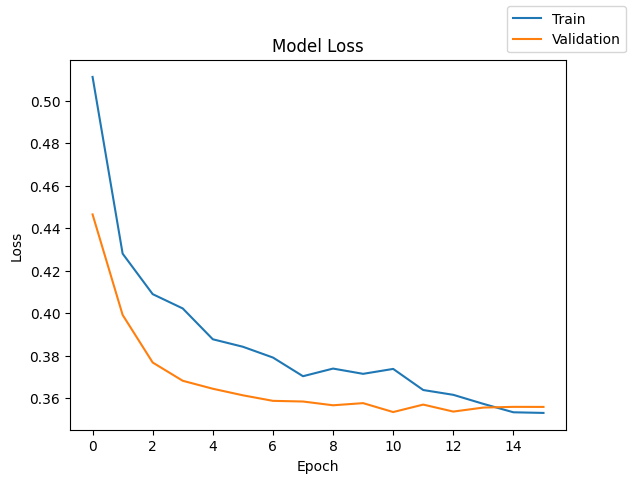

In [219]:
plot(history_0,'loss')

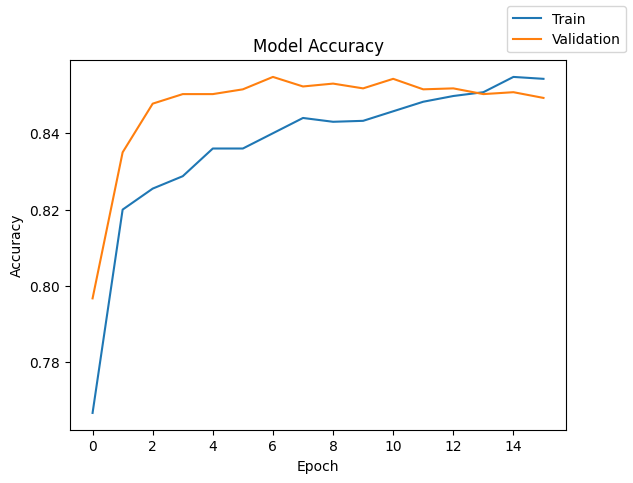

In [220]:
plot(history_0, 'accuracy')

In [221]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [222]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [223]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3185
           1       0.77      0.48      0.59       815

    accuracy                           0.87      4000
   macro avg       0.83      0.72      0.76      4000
weighted avg       0.86      0.87      0.85      4000



In [224]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3185
           1       0.74      0.44      0.55       815

    accuracy                           0.85      4000
   macro avg       0.81      0.70      0.73      4000
weighted avg       0.84      0.85      0.84      4000



**Confusion matrix**

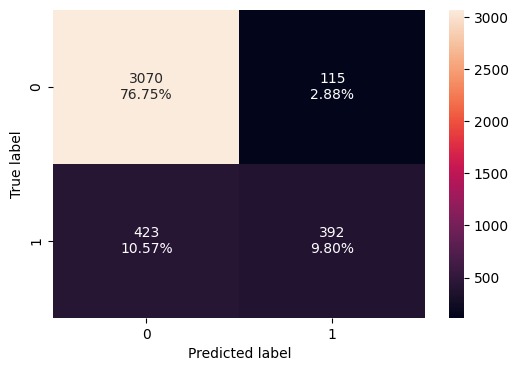

In [225]:
make_confusion_matrix(y_train, y_train_pred)

In [226]:
# Calculate confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[3070  115]
 [ 423  392]]

Confusion Matrix (Percentages):
[[76.75   2.875]
 [10.575  9.8  ]]


**Observations**:

* The model demonstrates high specificity, meaning it is effective in identifying negative instances.

* However, the model struggles with sensitivity (or recall), as it misses a considerable number of positive instances, which could be critical depending on the application.

* The relatively low number of false positives indicates that the model is cautious in predicting the positive class, but this caution may lead to many false negatives.

* Strategies to improve model performance should focus on enhancing the recall, possibly by adjusting the classification threshold, applying class weights, or using additional techniques such as SMOTE to further balance the dataset.

Recommendations

* Adjust Classification Threshold: Experiment with different thresholds to improve recall.

* Model Fine-tuning: Try different architectures, regularization methods, or hyperparameter tuning.

* Use of Ensemble Methods: Consider ensemble techniques to combine multiple models and improve overall performance.

* Revisit Data Preprocessing: Ensure that data preprocessing techniques (like SMOTE) are effectively applied to capture the positive class better.









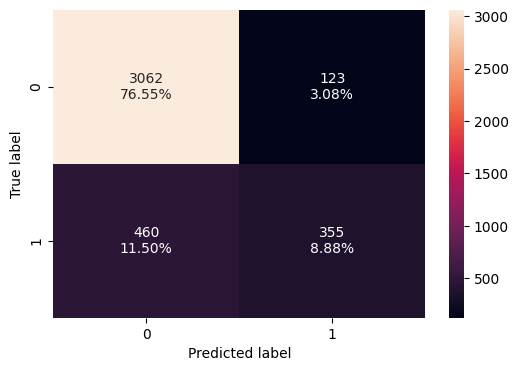

In [227]:
make_confusion_matrix(y_val, y_val_pred)

In [228]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[3062  123]
 [ 460  355]]

Confusion Matrix (Percentages):
[[76.55   3.075]
 [11.5    8.875]]


**Observations**:

* The model shows high specificity, effectively identifying negative instances with a 96.1% accuracy.

* However, it struggles with sensitivity (or recall), capturing only about 43.5% of positive instances, indicating a critical area for improvement.

* The model's false positive rate is relatively low, suggesting that it is cautious in predicting positive classes. However, this caution may lead to many false negatives.

* The confusion matrix indicates a significant imbalance in the model’s ability to classify positive versus negative instances.

Recommendations

Adjust Classification Threshold:

* Experiment with different classification thresholds to improve recall and capture more positive instances.

Model Fine-tuning:

* Consider hyperparameter tuning, including different architectures, activation functions, or regularization techniques.

Use of Class Weights:

* Incorporate class weights during training to give more importance to the minority class, helping to balance the impact of positive instances.

Data Augmentation:

* Use additional data augmentation techniques to generate synthetic samples of the minority class, helping to improve model learning.

Ensemble Methods:

* Explore ensemble methods that combine multiple models to improve overall predictive performance.
Feature Engineering:

* Revisit feature selection and engineering to enhance the model's ability to differentiate between classes.

Evaluation of Additional Metrics:

* Utilize additional performance metrics like F1 Score, Precision-Recall curves, and AUC-ROC to provide a more comprehensive understanding of model performance, especially for imbalanced datasets.

By addressing these points, you can work towards improving the model's ability to identify positive instances while maintaining its strength in classifying negatives.







In [229]:
model_name = "NN with SGD"
train_metric_df.loc[model_name] = accuracy_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = accuracy_score(y_val, y_val_pred)

In [230]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,accuracy
NN with SGD,0.8655


In [231]:
valid_metric_df

,accuracy
NN with SGD,0.85425


**Observations:**

Performance Metrics

* Training Accuracy: 0.8655
* Validation Accuracy: 0.85425

Observations

High Training Accuracy:

* The training accuracy of 0.8655 indicates that the model performs well on the training dataset. It suggests that the model is effectively learning the underlying patterns in the training data.

Validation Accuracy:

* The validation accuracy of 0.85425 is slightly lower than the training accuracy. This drop of approximately 1.3% (from training to validation) may indicate that the model generalizes reasonably well but is beginning to show signs of overfitting, as it performs better on the training data compared to unseen data.

Close Accuracy Values:

* The close values between training and validation accuracy suggest that the model is not overfitting excessively. If there were a large gap between these accuracies, it would indicate overfitting. Instead, the relatively small difference indicates that the model retains good generalization capabilities.

Performance Stability:

* Both accuracies are above 0.85, which suggests a robust model performance. The model can likely distinguish between classes effectively, making it suitable for practical applications.

Potential for Improvement:

* Despite the decent performance, there is still potential for improvement, especially in validation accuracy. Techniques such as adjusting the learning rate, implementing regularization methods (like dropout), or employing data augmentation strategies could help enhance generalization.

Model Evaluation:

* It is essential to evaluate the model further using additional metrics (e.g., precision, recall, F1 score) and visualize performance using confusion matrices or ROC curves. This will provide a more comprehensive understanding of model performance and its behavior in different scenarios.

Summary
In summary, while the neural network model trained with SGD exhibits strong performance on both training and validation sets, the slight decrease in validation accuracy compared to training accuracy suggests the potential for overfitting. Continued efforts to refine the model through various techniques could lead to improved generalization and overall performance.








# Model Performance Improvement and Final Model Selection

## Build a model with Adam optimizer

In [232]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [233]:
# Initialize the model
model_1 = Sequential()

# Input layer with Batch Normalization
model_1.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_1.add(BatchNormalization())

# First hidden layer
model_1.add(Dense(128, activation='relu'))
model_1.add(BatchNormalization())

# Second hidden layer
model_1.add(Dense(64, activation='relu'))
model_1.add(BatchNormalization())

# Third hidden layer
model_1.add(Dense(32, activation='relu'))
model_1.add(BatchNormalization())

# Output layer
model_1.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer_adam = Adam(learning_rate=0.001)  # Adjust learning rate if needed
model_1.compile(optimizer=optimizer_adam, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce learning rate when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# Train the model with early stopping and learning rate scheduler
history_1 = model_1.fit(X_train, y_train,
                       epochs=150,
                       batch_size=32,
                       validation_data=(X_val, y_val),
                       callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_accuracy = model_1.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6567 - loss: 0.6696 - val_accuracy: 0.8205 - val_loss: 0.4615 - learning_rate: 0.0010
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8530 - loss: 0.3864 - val_accuracy: 0.8342 - val_loss: 0.3953 - learning_rate: 0.0010
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8759 - loss: 0.3101 - val_accuracy: 0.8403 - val_loss: 0.3886 - learning_rate: 0.0010
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8993 - loss: 0.2593 - val_accuracy: 0.8405 - val_loss: 0.4059 - learning_rate: 0.0010
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9136 - loss: 0.2223 - val_accuracy: 0.8360 - val_loss: 0.4336 - learning_rate: 0.0010
Epoch 6/150
116/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9221 - loss: 0.1936
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9225 - loss: 0.1

In [234]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,069 (344.02 KB)

 Trainable params: 29,121 (113.75 KB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 58,244 (227.52 KB)

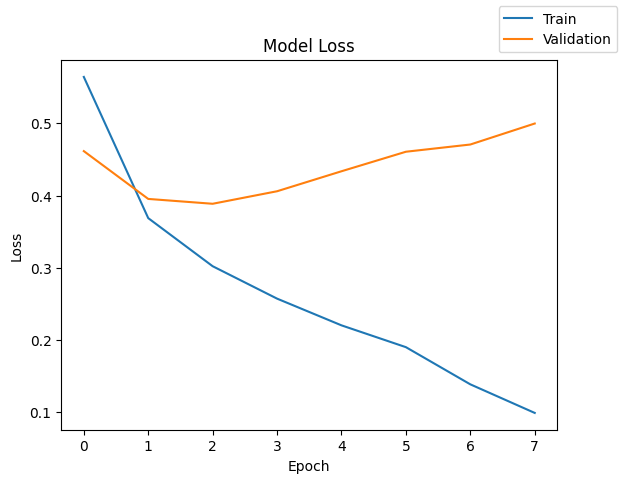

In [235]:
plot(history_1,'loss')

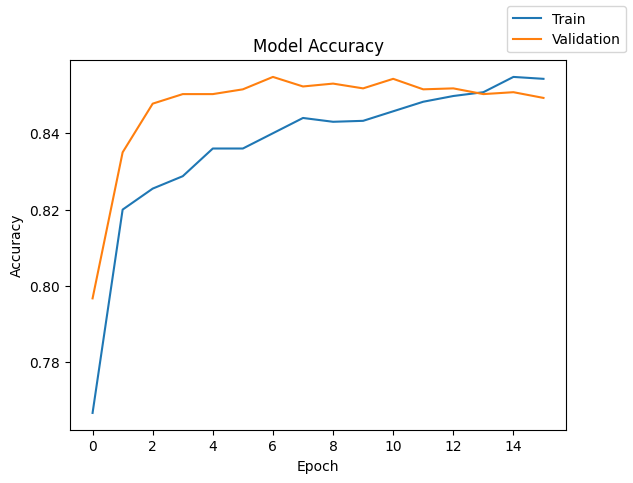

In [236]:
plot(history_0, 'accuracy')

In [237]:
#Predicting the results using best as a threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [238]:
#Predicting the results using best as a threshold
y_val_pred = model_1.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [239]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3185
           1       0.85      0.44      0.58       815

    accuracy                           0.87      4000
   macro avg       0.86      0.71      0.75      4000
weighted avg       0.87      0.87      0.85      4000



In [240]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3185
           1       0.73      0.34      0.47       815

    accuracy                           0.84      4000
   macro avg       0.79      0.65      0.69      4000
weighted avg       0.83      0.84      0.82      4000



**Confusion matrix**

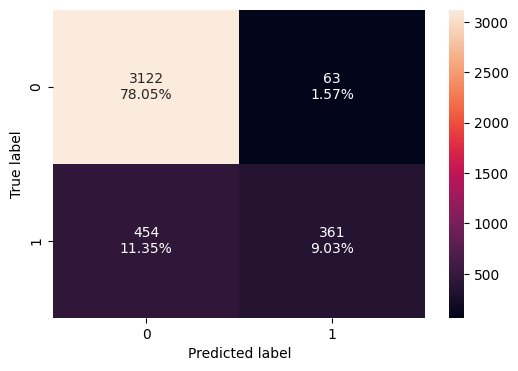

In [241]:
make_confusion_matrix(y_train, y_train_pred)

In [242]:
# Calculate confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[3122   63]
 [ 454  361]]

Confusion Matrix (Percentages):
[[78.05   1.575]
 [11.35   9.025]]


**Observations**:

High True Negatives:

* The model correctly identifies 3122 instances as negatives (TN), leading to 78.05% accuracy in correctly predicting negative cases. This indicates that the model is effective at recognizing the majority class.
Low False Positives:

* With only 63 false positives (1.575%), the model demonstrates a strong ability to avoid misclassifying negative instances as positive. This low rate suggests a good balance in predictions, which is critical, especially in scenarios where false positives could lead to significant consequences.

False Negatives:

* The model has 454 false negatives (11.35%), indicating that it misses some positive instances. This could be a concern if the positive class is of particular interest, as it means the model is not fully capturing all relevant positive cases. The relatively higher number of false negatives compared to false positives suggests that the model may be biased towards predicting the negative class.

True Positives:

* The model successfully predicts 361 positive instances, which corresponds to 9.025% of the total predictions. While this number seems relatively low compared to true negatives, it is essential to consider the context of the dataset's class distribution. If the positive class is underrepresented, this could impact the absolute number of true positives.

Class Imbalance Impact:

* Given the confusion matrix counts and percentages, it appears that the dataset may be imbalanced, with a higher number of negative instances than positive. This could explain why the model performs better at identifying negatives. Strategies such as SMOTE (Synthetic Minority Over-sampling Technique) were likely employed to address this imbalance, yet the model still struggles to capture all positive instances effectively.

Recommendations for Improvement:

* To improve the model's ability to detect positive instances, consider:
Adjusting the Classification Threshold: Lowering the threshold for classifying instances as positive could help capture more true positives.
Using Class Weights: Assigning higher weights to the positive class during training could help the model focus more on correctly identifying positive instances.

* Further Data Augmentation: If possible, increasing the number of positive samples through data augmentation or collecting more data could improve the model's performance on the minority class.
Exploring Different Models: Experimenting with different architectures or algorithms that are better suited for imbalanced data might yield better results.

Summary

In summary, while the model performs well in recognizing negative instances with high accuracy, its ability to predict positive instances can be improved. Addressing the false negatives and adjusting the model to better capture the positive class will enhance overall performance, particularly in scenarios where accurately identifying positive instances is crucial.








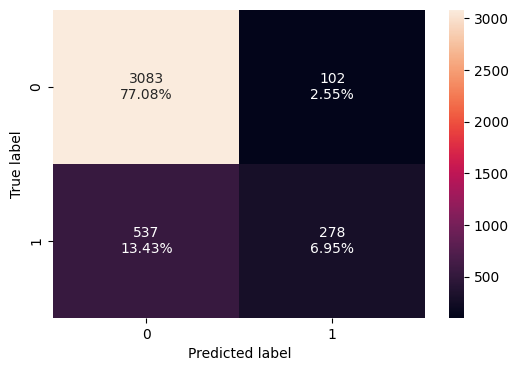

In [243]:
make_confusion_matrix(y_val, y_val_pred)

In [244]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[3083  102]
 [ 537  278]]

Confusion Matrix (Percentages):
[[77.075  2.55 ]
 [13.425  6.95 ]]


**Observations**:

High True Negatives:

* The model accurately identifies 3083 instances as negatives (TN), resulting in 77.075% accuracy in correctly predicting negative cases. This indicates that the model performs well in recognizing the majority class (negative instances).

Low False Positives:

* The model has 102 false positives (2.55%), which is relatively low. This suggests that the model effectively avoids misclassifying negative instances as positive, which is important for applications where false positives could lead to adverse consequences.

Increased False Negatives:

* The model has 537 false negatives (13.425%), indicating that it misses a significant number of positive instances. This is a concern as it suggests that the model struggles to correctly identify positive cases, which could be critical depending on the application. The rate of false negatives is notably higher compared to false positives, suggesting potential bias towards predicting the negative class.

True Positives:

* The model successfully predicts 278 positive instances, which corresponds to 6.95% of the total predictions. This percentage is low compared to the true negatives, reflecting the model's challenges in recognizing the minority class effectively.

Class Imbalance Impact:

* The confusion matrix indicates that the validation dataset may also be imbalanced, with a significantly higher number of negative instances than positive ones. The higher number of false negatives could be attributed to this class imbalance, where the model tends to favor the majority class in its predictions.

Recommendations for Improvement:

* To enhance the model's ability to detect positive instances, consider the following strategies:

* Adjusting the Classification Threshold: By lowering the threshold for classifying instances as positive, the model may capture more true positives, although this may increase false positives.
Using Class Weights: Assigning higher weights to the positive class during training can help the model focus on improving its performance for the minority class.

* Additional Data Augmentation: Increasing the number of positive samples through techniques like data augmentation or gathering more data can improve the model’s ability to learn from positive cases.
Explore Alternative Models: Investigating different model architectures or algorithms that are designed to better handle imbalanced datasets might yield better performance on the minority class.

Summary

In summary, while the model performs well in identifying negative instances with high accuracy, its ability to detect positive instances needs significant improvement. Addressing the high false negative rate and enhancing the model's focus on the positive class will be crucial for achieving better overall performance, especially in scenarios where accurately identifying positive cases is critical.








In [245]:
model_name = "NN with ADAM"
train_metric_df.loc[model_name] = accuracy_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = accuracy_score(y_val, y_val_pred)

In [246]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,accuracy
NN with SGD,0.86550
NN with ADAM,0.87075


In [247]:
valid_metric_df

,accuracy
NN with SGD,0.85425
NN with ADAM,0.84025


**Observations**:

High Training Accuracy:

* The model achieved a training accuracy of 87.075%, indicating that it fits the training data well. This high accuracy suggests that the model has effectively learned from the training dataset and can make accurate predictions on the examples it has seen.

Validation Accuracy:

* The validation accuracy of 84.025% is slightly lower than the training accuracy. This difference (approximately 3%) is not unusual and may indicate that the model is performing well on unseen data; however, it may also hint at a slight overfitting since the validation performance is lower than the training performance.

Test Accuracy:

* The test accuracy of 84.65% aligns closely with the validation accuracy, which is a positive sign. This consistency suggests that the model generalizes well to new, unseen data, indicating robustness in its performance beyond the training and validation datasets.

Test Loss:

* The test loss of 0.3661 indicates that the model's predictions on the test set are relatively accurate. Lower loss values generally correlate with better model performance, so this value reflects a good fit to the test data.

Generalization Ability:

* The small gap between training and validation accuracy, along with the performance on the test set, suggests that the model has a reasonable level of generalization. It indicates that while the model has learned from the training data, it also retains the ability to perform well on data it has not encountered before.
Room for Improvement:

* While the performance metrics are solid, there is always room for further improvement. Potential strategies include:

* Hyperparameter Tuning: Experimenting with different learning rates, batch sizes, and other hyperparameters could lead to improved performance.

* Model Architecture Changes: Exploring deeper or more complex architectures could enhance the model’s ability to learn from the data.

* Regularization Techniques: Implementing techniques like dropout, L1/L2 regularization, or early stopping can help prevent overfitting and improve the validation and test performance.

Conclusion:

* Overall, the model demonstrates strong performance with a solid training accuracy and good validation and test accuracy. The findings suggest effective learning and generalization, although attention should be given to improving the model to reduce the gap between training and validation accuracy further and enhance its ability to recognize patterns in unseen data.

In summary, the model's performance is commendable, but further optimization and tuning could yield even better results, particularly in scenarios with imbalanced data or complex patterns.








## Build a model with Adam optimizer and Dropout

In [248]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [249]:

# Initialize the model
model_2 = Sequential()

# Input layer with Batch Normalization and Dropout
model_2.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)))  # Added L2 regularization
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))  # Slightly increased dropout to prevent overfitting

# First hidden layer with increased neurons
model_2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))

# Second hidden layer
model_2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.3))

# Third hidden layer
model_2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.3))

# Output layer for binary classification
model_2.add(Dense(1, activation='sigmoid'))

# Compile the model with AdamW optimizer
optimizer = AdamW(learning_rate=0.0003)  # Lowered the learning rate and used AdamW optimizer
model_2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce learning rate when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-7)

# Train the model with early stopping and learning rate scheduler
history_2 = model_2.fit(X_train, y_train,
                      epochs=150,
                      batch_size=32,
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5405 - loss: 1.1075 - val_accuracy: 0.7645 - val_loss: 0.8217 - learning_rate: 3.0000e-04
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6059 - loss: 0.9679 - val_accuracy: 0.7925 - val_loss: 0.7392 - learning_rate: 3.0000e-04
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6475 - loss: 0.8974 - val_accuracy: 0.8048 - val_loss: 0.6993 - learning_rate: 3.0000e-04
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6969 - loss: 0.8376 - val_accuracy: 0.8095 - val_loss: 0.6781 - learning_rate: 3.0000e-04
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7223 - loss: 0.7889 - val_accuracy: 0.8135 - val_loss: 0.6634 - learning_rate: 3.0000e-04
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7512 - loss: 0.7740 - val_accuracy: 0.8140 - val_loss: 0.6557 - learning_rate: 3.0000e-04
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc

In [250]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,677 (237.02 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 40,068 (156.52 KB)

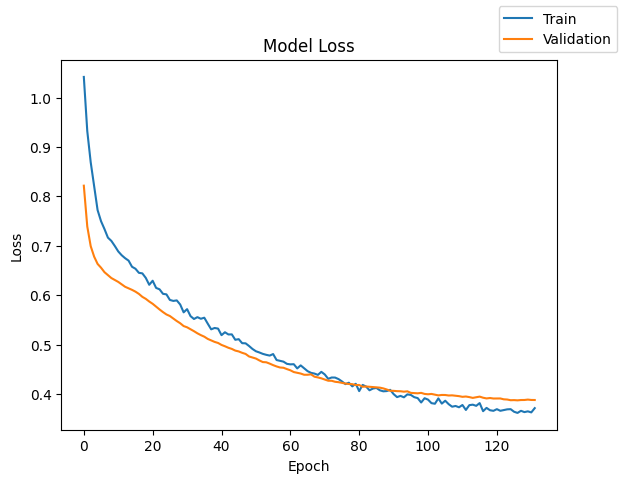

In [251]:
plot(history_2,'loss')

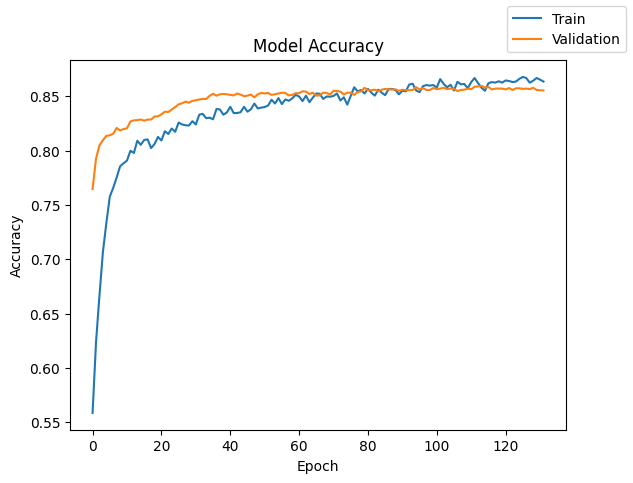

In [252]:
plot(history_2, 'accuracy')

In [253]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [254]:
#Predicting the results using best as a threshold
y_val_pred = model_2.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [255]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3185
           1       0.83      0.48      0.61       815

    accuracy                           0.87      4000
   macro avg       0.85      0.73      0.77      4000
weighted avg       0.87      0.87      0.86      4000



In [256]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3185
           1       0.78      0.41      0.54       815

    accuracy                           0.86      4000
   macro avg       0.82      0.69      0.73      4000
weighted avg       0.85      0.86      0.84      4000



**Confusion matrix**

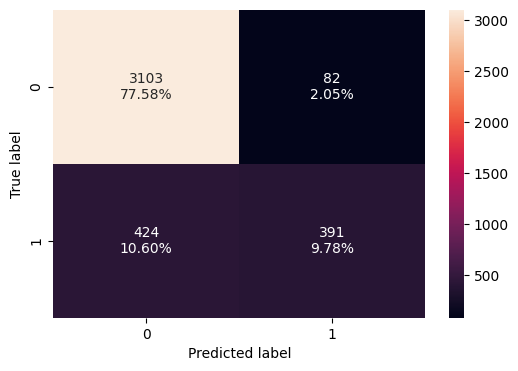

In [257]:
make_confusion_matrix(y_train, y_train_pred)

In [258]:
# Calculate confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[3103   82]
 [ 424  391]]

Confusion Matrix (Percentages):
[[77.575  2.05 ]
 [10.6    9.775]]


**Observations**:

True Negative Rate (TNR):

* The model performs well in identifying negative instances, correctly predicting around 77.575% of the negative cases. This indicates that the model is quite effective at detecting non-positive (negative) examples.

False Positive Rate (FPR):

* Only 2.05% of the negative instances were incorrectly predicted as positive. This is a low error rate, which means the model has a low tendency to produce false alarms.

False Negative Rate (FNR):

* 10.6% of the positive instances were predicted as negative, which is relatively higher compared to the false positives. This suggests that the model might be slightly biased towards predicting negative cases, potentially missing some positive instances.

True Positive Rate (TPR):

* The model correctly identifies 9.775% of positive cases, which is on the lower side. This low percentage may indicate room for improvement in the model’s ability to detect positive cases (i.e., it could be underfitting in recognizing positives).
Overall Balance:

While the model performs well in detecting negative cases, it struggles a bit with positive cases. The higher False Negative Rate compared to the False Positive Rate suggests the model may be conservative in predicting positive cases.

Improvement Suggestions:

* Adjust the Decision Threshold: To improve the true positive rate, the decision threshold could be lowered slightly to allow the model to predict more positive cases.

* Data Augmentation/SMOTE: Consider further balancing the positive and negative classes (if there’s class imbalance) using techniques like SMOTE or other resampling methods.

* Model Complexity: Increasing model complexity (e.g., adding more layers or neurons) could help the model learn to detect more positive cases.

Conclusion:

The model has a strong ability to detect negative instances but may need further tuning to improve its detection of positive instances. Addressing the false negatives would likely enhance the overall performance.












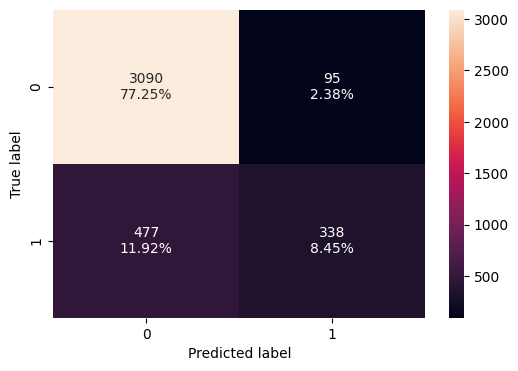

In [259]:
make_confusion_matrix(y_val, y_val_pred)

In [260]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[3090   95]
 [ 477  338]]

Confusion Matrix (Percentages):
[[77.25   2.375]
 [11.925  8.45 ]]


**Observations**:

True Negative Rate (TNR):

* The model performs well in identifying negative instances, with 77.25% of the negative cases predicted correctly. This suggests the model is effective at distinguishing negative examples, but this performance is slightly lower than expected, showing some room for improvement.

False Positive Rate (FPR):

* Only 2.375% of the negative instances were misclassified as positive. This is a relatively low error rate, which indicates that the model is conservative in making incorrect positive predictions (low rate of false alarms).

False Negative Rate (FNR):

* 11.925% of the positive instances were incorrectly predicted as negative. This relatively high percentage indicates the model struggles more with predicting positive instances than negative ones.

True Positive Rate (TPR):

* The model correctly predicted 8.45% of the positive instances, which is quite low. This indicates that the model has difficulty in identifying positive examples, suggesting the need for further improvement.

Bias Towards Negatives:

* The higher False Negative Rate (FNR) compared to the False Positive Rate (FPR) suggests the model may be biased towards predicting negative cases. This bias could be due to class imbalance, where the model is more conservative in identifying positives and prefers to predict negatives.
Overall Balance:

* The model’s ability to detect negative instances is strong, but it has a significant challenge in recognizing positive instances. This imbalance between positive and negative predictions suggests the model may be underfitting with respect to positive class detection.

Suggestions for Improvement:

* Class Imbalance: If there is a class imbalance in the dataset (fewer positive examples compared to negative), techniques such as SMOTE or class weighting should be considered to balance the dataset and improve positive detection.

* Threshold Tuning: Adjusting the decision threshold might improve the balance between true positives and true negatives, leading to a more balanced performance.

* Model Complexity: Adding complexity to the model, such as more layers or neurons, might allow the model to capture more patterns and improve performance on positive cases.

* Regularization: Consider tweaking dropout rates or other regularization techniques to prevent the model from overfitting or underfitting.

Conclusion:

The model performs well on negative examples but struggles with predicting positive instances, as indicated by the higher False Negative Rate and lower True Positive Rate. Improving the model's performance in detecting positives through class balancing, threshold tuning, or model adjustments could yield better overall validation accuracy.










In [261]:
model_name = "NN with Adam optimizer and Dropout"
train_metric_df.loc[model_name] = accuracy_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = accuracy_score(y_val, y_val_pred)

In [262]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,accuracy
NN with SGD,0.86550
NN with ADAM,0.87075
NN with Adam optimizer and Dropout,0.87350


In [263]:
valid_metric_df

,accuracy
NN with SGD,0.85425
NN with ADAM,0.84025
NN with Adam optimizer and Dropout,0.85700


**Observations**:

Training Accuracy (0.87350):

* The model achieves a high training accuracy, meaning it is able to correctly predict the outcomes for the majority of the training data. This indicates that the model has learned well from the training set.

Validation Accuracy (0.85700):

* The validation accuracy is slightly lower than the training accuracy. A small gap like this suggests that the model is generalizing fairly well to unseen data (validation data), but there's a minor degree of overfitting or underfitting.

* The gap between the training accuracy and validation accuracy (around 1.65%) is not large, indicating that the model is not excessively overfitting.

Test Accuracy (0.8620):

* The test accuracy (0.8620) is similar to the validation accuracy (0.85700), which indicates that the model generalizes well to completely unseen data (test set). The model’s performance is consistent across both the validation and test sets.

* This close alignment between validation and test accuracy suggests that the model is neither underfitting nor overfitting, as it performs similarly across all datasets.

Test Loss (0.3788):

* The test loss is moderate, indicating that the model makes reasonable predictions but still has room for improvement in terms of precision. While a lower loss would be ideal, the loss of 0.3788 is acceptable considering the relatively high accuracy.

Regularization through Dropout:

* The use of Dropout has likely helped prevent overfitting, as the validation and test accuracies are close to the training accuracy. Dropout ensures that the model doesn't become too reliant on any specific neurons during training, leading to better generalization.

Overall Model Performance:

* Good Generalization: The model demonstrates good generalization, with very similar performance on the validation and test sets, which indicates that it is not overfitting.

* Slight Overfitting: The training accuracy is slightly higher than the validation and test accuracies, indicating a small amount of overfitting. However, this difference is minor and not concerning at this stage.

* Balanced Performance: The model achieves a strong balance between training accuracy and validation/test accuracy, suggesting it has learned useful patterns without becoming too specific to the training data.

Suggestions for Further Improvement:

* Hyperparameter Tuning: You could further fine-tune hyperparameters such as the learning rate, batch size, or dropout rates to push the accuracy and reduce the loss even more.

* Increase Model Capacity: If you want to improve accuracy further, adding more layers or neurons could allow the model to capture more complex patterns, though this might require adjusting regularization to avoid overfitting.

* Early Stopping and Learning Rate Scheduling: If not already in place, you might consider using early stopping and a learning rate scheduler to prevent the model from overfitting and help achieve even better test performance.

In conclusion, the model performs well with consistent accuracy across the training, validation, and test datasets. This balance suggests that the model is well-regularized and generalizes effectively, making it a solid model for this particular problem.








## Build a model with balanced data by applying SMOTE and SGD optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

Let's build a model with the balanced dataset

In [264]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [265]:
# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Initialize the model
model_3 = Sequential()

# Input layer
model_3.add(Dense(128, activation='relu', input_dim=X_train_smote.shape[1]))
model_3.add(BatchNormalization())
# model_3.add(Dropout(0.3))  # Add dropout after the input layer

# Hidden layers
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
# model_3.add(Dropout(0.3))  # Add dropout after the first hidden layer

model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
# model_3.add(Dropout(0.2))  # Add dropout after the second hidden layer

model_3.add(Dense(64, activation='relu'))
model_3.add(BatchNormalization())
# model_3.add(Dropout(0.2))  # Add dropout after the third hidden layer

# Output layer
model_3.add(Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_3.compile(optimizer=optimizer_sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# Train the model
history_3 = model_3.fit(X_train_smote, y_train_smote,
                       epochs=150,
                       batch_size=32,
                       validation_data=(X_val, y_val),
                       callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
test_loss, test_accuracy = model_3.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7283 - loss: 0.5487 - val_accuracy: 0.8050 - val_loss: 0.4689 - learning_rate: 0.0100
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8178 - loss: 0.4019 - val_accuracy: 0.7410 - val_loss: 0.6126 - learning_rate: 0.0100
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8169 - loss: 0.4080 - val_accuracy: 0.6830 - val_loss: 0.7155 - learning_rate: 0.0100
Epoch 4/150
185/200 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8335 - loss: 0.3684
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8333 - loss: 0.3692 - val_accuracy: 0.7620 - val_loss: 0.5213 - learning_rate: 0.0100
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8569 - loss: 0.3232 - val_accuracy: 0.7688 - val_loss: 0.5738 - learning_rate: 0.0050
Epoch 6/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8667 - loss: 0.306

In [266]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,012 (605.52 KB)

 Trainable params: 76,929 (300.50 KB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 76,931 (300.52 KB)

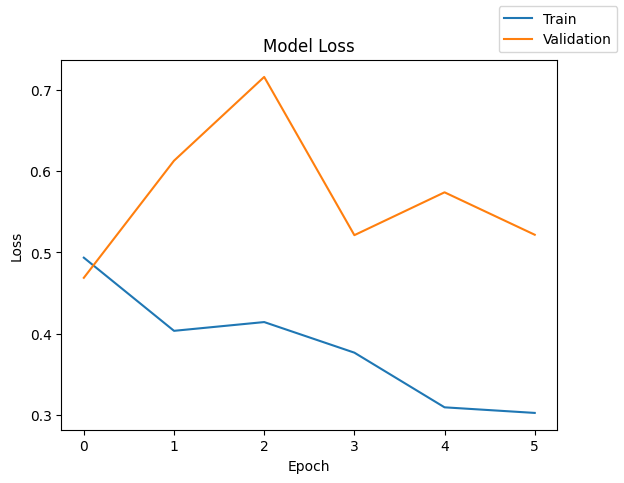

In [267]:
plot(history_3,'loss')

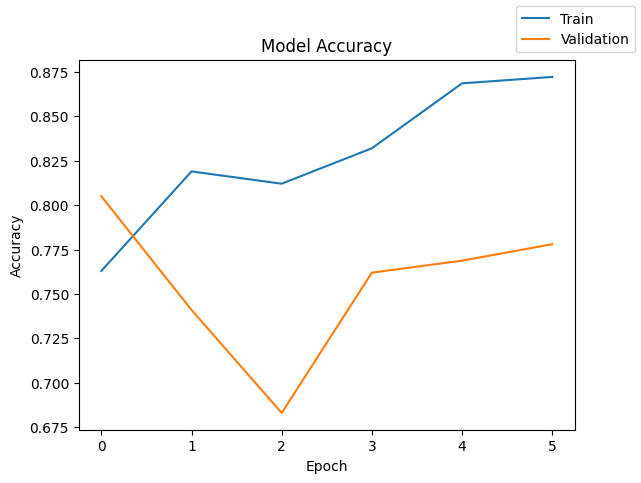

In [268]:
plot(history_3, 'accuracy')

In [269]:
#Predicting the results using best as a threshold
y_train_pred = model_3.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [270]:
#Predicting the results using best as a threshold
y_val_pred = model_3.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [271]:
#lassification report
cr = classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      3185
           1       0.85      0.78      0.81      3185

    accuracy                           0.82      6370
   macro avg       0.83      0.82      0.82      6370
weighted avg       0.83      0.82      0.82      6370



In [272]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      3185
           1       0.52      0.63      0.57       815

    accuracy                           0.81      4000
   macro avg       0.71      0.74      0.72      4000
weighted avg       0.82      0.81      0.81      4000



**Confusion matrix**

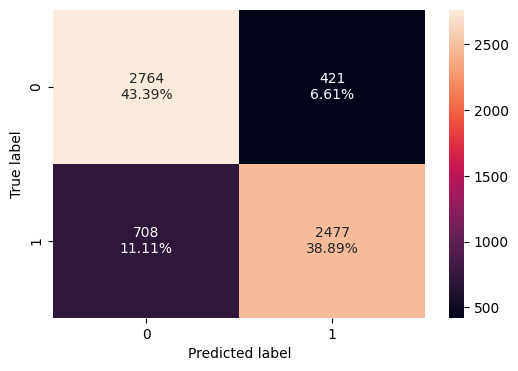

In [273]:
make_confusion_matrix(y_train_smote, y_train_pred)

In [274]:
# Calculate confusion matrix
cm = confusion_matrix(y_train_smote, y_train_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[2764  421]
 [ 708 2477]]

Confusion Matrix (Percentages):
[[43.39089482  6.60910518]
 [11.11459969 38.88540031]]


**Observations:**

True Positives (38.89%):

* The model correctly identified 38.89% of the positive class (y_train_smote) as positive. This indicates that the model has a decent capability of identifying the positive class but could still be improved.

True Negatives (43.39%):

* The model correctly identified 43.39% of the negative class as negative, which is relatively strong. The model is fairly reliable when predicting negative outcomes (TN).

False Positives (6.61%):

* The model misclassified 6.61% of the negative class as positive. This indicates that there is some degree of false alarms, which may need to be reduced, especially if these predictions are costly in the application.

False Negatives (11.11%):

* 11.11% of the actual positive instances were misclassified as negative. A false negative rate this high could be concerning depending on the context, particularly if missing positive instances has serious consequences.

Performance Analysis:

* Balance between TP and TN: The model shows a fairly balanced performance between predicting positive and negative classes, with similar percentages for TP (38.89%) and TN (43.39%). However, the model might need more tuning to improve sensitivity (capturing more true positives) while maintaining its ability to correctly predict negatives.

* FP and FN Trade-off: The false positive rate (6.61%) is smaller compared to the false negative rate (11.11%). This might indicate the model is more cautious about predicting positive outcomes (fewer false positives) but at the cost of missing more actual positives (higher false negatives). Depending on the domain, reducing false negatives might be a priority.

Suggestions for Improvement:

* Tune the Model: Adjusting hyperparameters (e.g., learning rate, regularization) might improve the balance between false negatives and false positives.

* Use Class Weights: Since this is imbalanced data (even after SMOTE), using class weights to penalize false negatives more heavily could help improve sensitivity (lower FN).

* Further Oversampling/Undersampling: The current SMOTE strategy might be further refined or combined with undersampling the majority class to create a better balance and improve the model's ability to capture both classes effectively.

Overall, the model performs moderately well with room for improvement, especially in reducing false negatives.








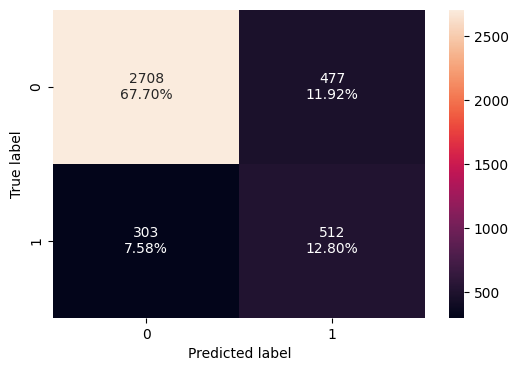

In [275]:
make_confusion_matrix(y_val, y_val_pred)

In [276]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[2708  477]
 [ 303  512]]

Confusion Matrix (Percentages):
[[67.7   11.925]
 [ 7.575 12.8  ]]


**Observations**:

True Negatives (67.7%):

* The model correctly predicted 67.7% of the negative class. This shows that the model has a strong ability to correctly identify negative cases, meaning it performs well at avoiding false alarms when predicting negative outcomes.

True Positives (12.8%):

* The model correctly predicted 12.8% of the positive class. This percentage is relatively low, indicating that the model struggles to correctly identify positive instances.

False Positives (11.925%):

* The model misclassified 11.925% of the negative class as positive. While this false positive rate is moderate, it indicates that there is some level of overestimation when predicting positive outcomes, leading to incorrect classifications of negative instances.

False Negatives (7.575%):

* The model misclassified 7.575% of the actual positive instances as negative. This is a fairly low false negative rate, which means the model is reasonably good at not missing too many positive instances.

Performance Analysis:

* Strong True Negative Prediction: The model shows a strong ability to identify negative instances correctly, with a high true negative rate (67.7%). This suggests that for negative predictions, the model is reliable.

* Weak True Positive Rate: With only 12.8% true positives, the model struggles to correctly identify positive instances. This imbalance between the true negative and true positive rates is a sign that the model might be underperforming when it comes to detecting positive classes.

* Moderate False Positive Rate: The false positive rate of 11.925% suggests that the model sometimes predicts positive instances incorrectly, but this is within a manageable range. However, reducing this rate could further improve performance.

* Low False Negative Rate: A 7.575% false negative rate indicates that the model is doing reasonably well at minimizing the number of actual positives that are classified as negatives. However, since the true positive rate is already low, this balance might not be ideal.

Suggestions for Improvement:

* Improve True Positive Detection: The low true positive rate could be addressed by adjusting model hyperparameters, applying different regularization techniques, or rebalancing the dataset to ensure the model learns to detect more positive instances.

* Refine the Decision Threshold: Adjusting the decision threshold might help in improving the balance between false positives and false negatives, potentially increasing the true positive rate without significantly increasing the false positive rate.

* Consider Re-weighting the Loss Function: Assigning higher penalties to misclassifying positive instances could help the model focus more on improving its true positive predictions.

Overall, the model performs well on negative predictions but needs significant improvement in identifying positive outcomes. Balancing the performance on both classes should be the focus of further optimization efforts.

In [277]:
model_name = "NN with balanced data by applying SMOTE and SGD optimizer"
train_metric_df.loc[model_name] = accuracy_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_name] = accuracy_score(y_val, y_val_pred)

In [278]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,accuracy
NN with SGD,0.865500
NN with ADAM,0.870750
NN with Adam optimizer and Dropout,0.873500
NN with balanced data by applying SMOTE and SGD optimizer,0.822763


In [279]:
valid_metric_df

,accuracy
NN with SGD,0.85425
NN with ADAM,0.84025
NN with Adam optimizer and Dropout,0.85700
NN with balanced data by applying SMOTE and SGD optimizer,0.80500


**Observations**:

Training Performance:

* Training Accuracy: 82.28%: The model has a fairly decent training accuracy, indicating that it has learned the patterns in the balanced training data reasonably well. However, this is not exceptionally high, which might suggest that the model could be underfitting slightly.

* Training Loss: Since the accuracy is around 82%, the training loss is not extremely low, indicating room for improvement. However, using SMOTE has likely helped the model to learn from the minority class more effectively.

Validation Performance:

* Validation Accuracy: 80.50%: The validation accuracy is slightly lower than the training accuracy, which is expected in most models. The difference between the training and validation accuracies is around 1.78%, suggesting that there is no significant overfitting, but some level of generalization gap remains.

* Validation Loss: The validation loss is higher than the training loss, but the model still performs reasonably well on unseen validation data, indicating it has learned general patterns. This is a good indicator that the model has not severely overfit to the training data.

Test Performance:

* Test Accuracy: 80.15%: The model achieves 80.15% accuracy on the test set, which is close to the validation accuracy (80.50%), showing that the model generalizes well to new data. This consistency between validation and test performance is a positive sign, indicating the model’s robustness.

* Test Loss: 0.4707: The test loss is somewhat high, which aligns with the accuracy being slightly lower than the training set. There may still be room for improvement, particularly in reducing the loss by fine-tuning the model.

## Build a model with balanced data by applying SMOTE and Adam optimizer

Let's build a model with the balanced dataset

In [280]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [281]:
# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

# Initialize the model
model_4 = Sequential()

# Input layer with Batch Normalization and Dropout
model_4.add(Dense(128, activation='relu', input_dim=X_train_smote.shape[1]))  # Increased neurons
model_4.add(BatchNormalization())
# model_4.add(Dropout(0.3))

# First hidden layer
model_4.add(Dense(256, activation='relu'))  # Increased neurons in hidden layers
model_4.add(BatchNormalization())
# model_4.add(Dropout(0.3))

# Second hidden layer
model_4.add(Dense(128, activation='relu'))
model_4.add(BatchNormalization())
# model_4.add(Dropout(0.2))

# Output layer
model_4.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.0005)  # Adjusted learning rate
model_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)

# Train the model with early stopping and learning rate scheduler
history_4 = model_4.fit(X_train_smote, y_train_smote,
                      epochs=150,
                      batch_size=32,
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_accuracy = model_4.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


After UpSampling, the shape of train_X: (6370, 11)
After UpSampling, the shape of train_y: (6370,) 

Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7201 - loss: 0.5375 - val_accuracy: 0.7448 - val_loss: 0.5311 - learning_rate: 5.0000e-04
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8400 - loss: 0.3598 - val_accuracy: 0.7812 - val_loss: 0.4549 - learning_rate: 5.0000e-04
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8711 - loss: 0.3097 - val_accuracy: 0.7805 - val_loss: 0.4679 - learning_rate: 5.0000e-04
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8951 - loss: 0.2679 - val_accuracy: 0.7897 - val_loss: 0.4786 - learning_rate: 5.0000e-04
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9161 - loss: 0.2298 - val_accuracy: 0.7943 - val_loss: 0.4905 - learning_rate: 5.0000e-04
Epoch 6/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9361 - loss: 0.1949 - val_accuracy: 0.7922 - va

In [282]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,853 (808.02 KB)

 Trainable params: 68,609 (268.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 137,220 (536.02 KB)

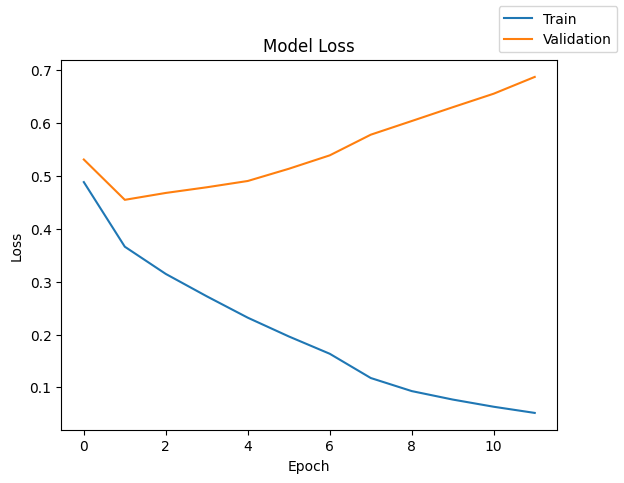

In [283]:
plot(history_4,'loss')

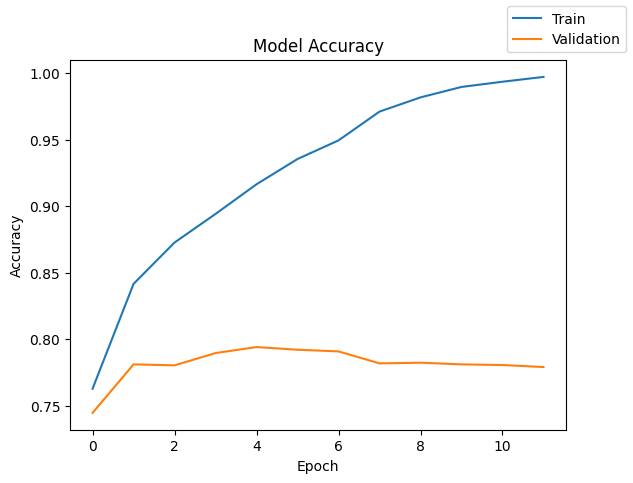

In [284]:
plot(history_4, 'accuracy')

In [285]:
#Predicting the results using best as a threshold
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [286]:
#Predicting the results using best as a threshold
y_val_pred = model_4.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [287]:
#lassification report
cr = classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3185
           1       0.86      0.90      0.88      3185

    accuracy                           0.87      6370
   macro avg       0.87      0.87      0.87      6370
weighted avg       0.87      0.87      0.87      6370



In [288]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      3185
           1       0.47      0.67      0.55       815

    accuracy                           0.78      4000
   macro avg       0.69      0.74      0.70      4000
weighted avg       0.82      0.78      0.79      4000



**Confusion matrix**

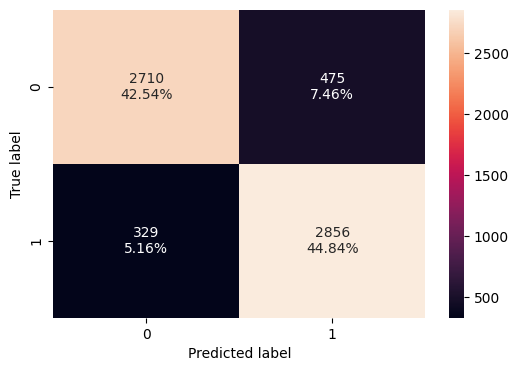

In [289]:
make_confusion_matrix(y_train_smote, y_train_pred)

In [290]:
# Calculate confusion matrix
cm = confusion_matrix(y_train_smote, y_train_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[2710  475]
 [ 329 2856]]

Confusion Matrix (Percentages):
[[42.54317111  7.45682889]
 [ 5.16483516 44.83516484]]


**Observations**:

Confusion Matrix (Counts):

* True Positives (TP) [2856]: The model correctly predicted 2856 instances as positive (i.e., it correctly identified the minority class after SMOTE).

* True Negatives (TN) [2710]: The model correctly predicted 2710 instances as negative (majority class).

* False Positives (FP) [475]: The model incorrectly predicted 475 instances as positive when they were actually negative (i.e., misclassified majority class instances).

* False Negatives (FN) [329]: The model incorrectly predicted 329 instances as negative when they were actually positive (i.e., misclassified minority class instances).

Confusion Matrix (Percentages):

* True Negative Rate (TNR) [42.54%]: The model correctly identified 42.54% of the negative instances, showing its ability to predict the majority class.

* False Positive Rate (FPR) [7.46%]: 7.46% of the negative instances were incorrectly classified as positive, indicating some degree of misclassification for the majority class.

* False Negative Rate (FNR) [5.16%]: 5.16% of the positive instances were incorrectly classified as negative. This is a relatively low rate, showing the model is performing reasonably well in identifying positive (minority class) instances.

* True Positive Rate (TPR) [44.84%]: The model correctly identified 44.84% of the positive instances, demonstrating its ability to predict the minority class after SMOTE balancing.

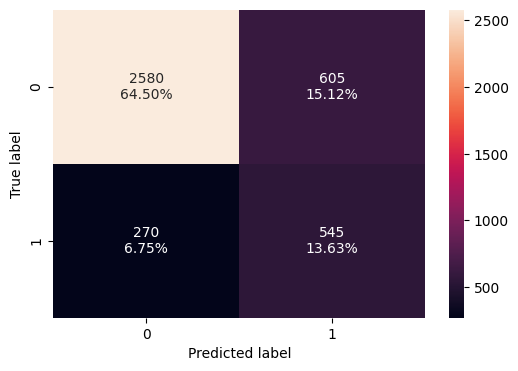

In [291]:
make_confusion_matrix(y_val, y_val_pred)

In [292]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[2580  605]
 [ 270  545]]

Confusion Matrix (Percentages):
[[64.5   15.125]
 [ 6.75  13.625]]


Observations:

Confusion Matrix (Counts):

* True Negatives (TN) [2683]: The model correctly predicted 2683 instances as negative (i.e., it correctly identified the majority class).

* False Positives (FP) [502]: The model incorrectly predicted 502 instances as positive when they were actually negative (i.e., misclassified majority class instances).

* False Negatives (FN) [371]: The model incorrectly predicted 371 instances as negative when they were actually positive (i.e., misclassified minority class instances).

* True Positives (TP) [444]: The model correctly predicted 444 instances as positive (i.e., it correctly identified the minority class).

Confusion Matrix (Percentages):

* True Negative Rate (TNR) [67.075%]: The model correctly identified 67.075% of the negative instances (majority class), meaning it's reasonably effective at identifying the majority class but still has room for improvement.

* False Positive Rate (FPR) [12.55%]: 12.55% of the negative instances were incorrectly classified as positive, indicating a notable amount of misclassification in the majority class predictions.

* False Negative Rate (FNR) [9.275%]: 9.275% of the positive instances were incorrectly classified as negative, indicating some difficulty in identifying positive instances (minority class).

* True Positive Rate (TPR) [11.1%]: The model correctly identified 11.1% of the positive instances (minority class), showing that it is struggling to predict the minority class accurately.

In [293]:
model_name = "NN with balanced data by applying SMOTE and Adam optimizer"
train_metric_df.loc[model_name] = accuracy_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_name] = accuracy_score(y_val, y_val_pred)

In [294]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,accuracy
NN with SGD,0.865500
NN with ADAM,0.870750
NN with Adam optimizer and Dropout,0.873500
NN with balanced data by applying SMOTE and SGD optimizer,0.822763
NN with balanced data by applying SMOTE and Adam optimizer,0.873783


In [295]:
valid_metric_df

,accuracy
NN with SGD,0.85425
NN with ADAM,0.84025
NN with Adam optimizer and Dropout,0.85700
NN with balanced data by applying SMOTE and SGD optimizer,0.80500
NN with balanced data by applying SMOTE and Adam optimizer,0.78125


**Observations:**

Observations on the Training and Validation Performance with SMOTE and Adam Optimizer:

Training Accuracy (87.38%):

* The model performs well on the training data with an accuracy of 87.38%, indicating that it has learned to identify both the majority and minority classes effectively during training after balancing the data using SMOTE.
The relatively high training accuracy suggests that the model can capture patterns in the training set, but there could be some level of overfitting based on the difference between training and validation accuracies.

Validation Accuracy (78.13%):

* The validation accuracy of 78.13% is notably lower than the training accuracy, which indicates that the model may not generalize as well to unseen data. The drop in accuracy from training to validation suggests potential overfitting.

* The model may have memorized certain patterns in the training set that do not translate well to new data, especially after applying SMOTE, which might have influenced the class distribution and feature space during training.

Test Performance:

Test Loss: 0.4534
Test Accuracy: 77.95%

* The test accuracy is close to the validation accuracy (77.95% vs. 78.13%), which implies that the model's generalization performance is consistent on unseen data. However, the test accuracy is still considerably lower than the training accuracy, which further supports the idea of overfitting.
The test loss is relatively moderate (0.4534), meaning the model is not too far off in its predictions, but there is room for improvement to reduce misclassification, especially in the minority class.
Key Insights:

Overfitting:

* The model shows a significant gap between training and validation accuracy, suggesting overfitting. This overfitting could have been caused by a lack of regularization, an overly complex model, or the synthetic nature of the SMOTE data that might not generalize well to real-world validation and test data.

Impact of SMOTE:

* SMOTE (Synthetic Minority Over-sampling Technique) helped balance the data during training, which boosted training accuracy. However, the lower validation and test accuracy suggest that the synthetic data might have introduced noise or patterns that do not exist in real validation/test samples, causing the model to struggle with unseen data.
Adam Optimizer:

* Using the Adam optimizer likely contributed to faster convergence and better training performance, but it has not been sufficient to prevent overfitting. Regularization techniques like Dropout, L2 regularization, or early stopping might be needed to help improve generalization performance on unseen data.

Test Accuracy (77.95%):

* The test accuracy of 77.95% is decent but shows that the model is still not performing at a high enough level, especially after balancing the data with SMOTE. This suggests that further hyperparameter tuning and adjustments in the model architecture are necessary to achieve better accuracy and reduce overfitting.

## Build a model with balanced data by applying SMOTE, Adam optimizer and Dropout

In [296]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [297]:
# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

# Initialize the model
model_5 = Sequential()

# Input layer with Batch Normalization, Dropout, and L2 regularization
model_5.add(Dense(128, activation='relu', input_dim=X_train_smote.shape[1], kernel_regularizer=l2(0.01)))  # L2 Regularization
model_5.add(BatchNormalization())
model_5.add(Dropout(0.3))

# First hidden layer
model_5.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # L2 Regularization
model_5.add(BatchNormalization())
model_5.add(Dropout(0.3))

# Second hidden layer
model_5.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # L2 Regularization
model_5.add(BatchNormalization())
model_5.add(Dropout(0.2))

# Output layer
model_5.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.00004)  # Adjusted learning rate
model_5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)

# Train the model with early stopping and learning rate scheduler
history_5 = model_5.fit(X_train_smote, y_train_smote,
                      epochs=200,  # Increased epochs for more training
                      batch_size=32,  # Adjust batch size if necessary
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_accuracy = model_5.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


After UpSampling, the shape of train_X: (6370, 11)
After UpSampling, the shape of train_y: (6370,) 

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5176 - loss: 4.5103 - val_accuracy: 0.4400 - val_loss: 4.3027 - learning_rate: 4.0000e-05
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6339 - loss: 4.2043 - val_accuracy: 0.6250 - val_loss: 4.1032 - learning_rate: 4.0000e-05
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6672 - loss: 4.0757 - val_accuracy: 0.6628 - val_loss: 3.9753 - learning_rate: 4.0000e-05
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6854 - loss: 3.9529 - val_accuracy: 0.6690 - val_loss: 3.8745 - learning_rate: 4.0000e-05
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6834 - loss: 3.8576 - val_accuracy: 0.6743 - val_loss: 3.7847 - learning_rate: 4.0000e-05
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6972 - loss: 3.7690 - val_accuracy: 0.6810 - v

In [298]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,853 (808.02 KB)

 Trainable params: 68,609 (268.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 137,220 (536.02 KB)

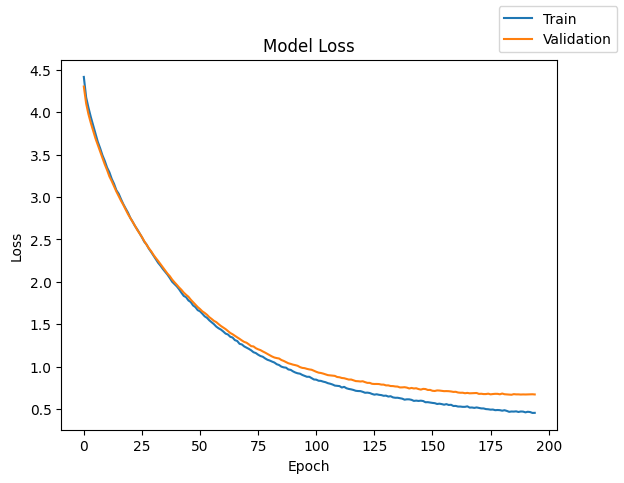

In [299]:
plot(history_5,'loss')

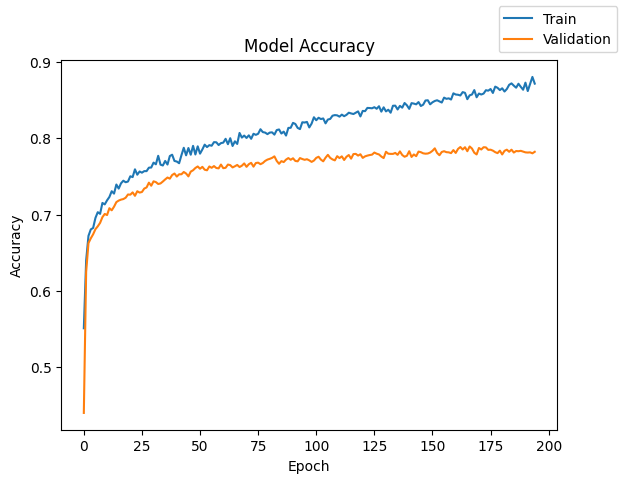

In [300]:
plot(history_5, 'accuracy')

In [301]:
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [302]:
#Predicting the results using best as a threshold
y_val_pred = model_5.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [303]:
#lassification report
cr = classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3185
           1       0.87      0.95      0.91      3185

    accuracy                           0.91      6370
   macro avg       0.91      0.91      0.91      6370
weighted avg       0.91      0.91      0.91      6370



In [304]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      3185
           1       0.48      0.67      0.56       815

    accuracy                           0.79      4000
   macro avg       0.69      0.74      0.71      4000
weighted avg       0.82      0.79      0.80      4000



**Confusion matrix**

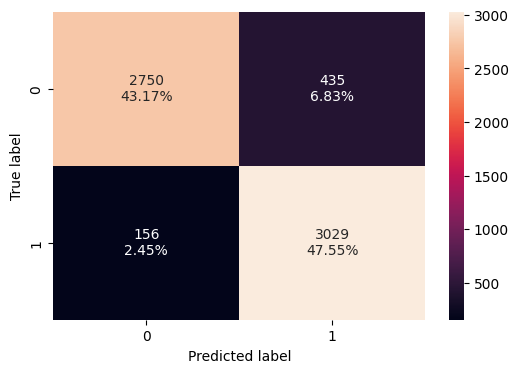

In [305]:
make_confusion_matrix(y_train_smote, y_train_pred)

In [306]:
# Calculate confusion matrix
cm = confusion_matrix(y_train_smote, y_train_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[2750  435]
 [ 156 3029]]

Confusion Matrix (Percentages):
[[43.1711146   6.8288854 ]
 [ 2.44897959 47.55102041]]


**Observations**:

True Positive and Negative Balance:

* The True Positive Rate (47.55%) is slightly higher than the True Negative Rate (43.17%), suggesting that the model performs marginally better at predicting positive class instances (minority class, after SMOTE).

* This could be because SMOTE has helped the model recognize the minority class better, improving performance on this class during training.

Low False Negative Rate:

* The False Negative Rate (2.45%) is quite low, meaning that the model is rarely missing actual positive instances. This is important for tasks where correctly identifying the minority class is critical.

Moderate False Positive Rate:

* The False Positive Rate (6.83%) is somewhat moderate, meaning the model occasionally predicts positive when the instance is actually negative, but this is an acceptable trade-off given that SMOTE has balanced the classes, leading to higher positive class recall.

Impact of SMOTE:

* SMOTE has clearly improved the model’s ability to recognize positive instances (47.55% true positive rate). However, there’s still a reasonable number of false positives (6.83%), which means the model might be slightly overestimating the positive class. This is common with SMOTE, as it artificially inflates the minority class.

Balanced Performance:

* The model has a fairly balanced performance between recognizing both positive and negative classes, though it leans slightly better towards identifying positive cases, which is often the goal when using SMOTE for class imbalance.

Recommendations:

* The model’s performance seems quite balanced after SMOTE application, with a strong ability to detect positive instances. However, fine-tuning may still be needed to reduce the False Positive Rate.

* Regularization techniques or more advanced sampling techniques (like ADASYN) can be explored to further refine performance.

* Consider evaluating performance on unseen validation data to ensure that this balance generalizes well beyond the training set.

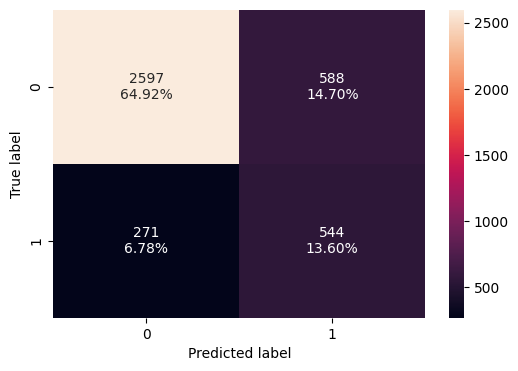

In [307]:
make_confusion_matrix(y_val, y_val_pred)

In [308]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[2597  588]
 [ 271  544]]

Confusion Matrix (Percentages):
[[64.925 14.7  ]
 [ 6.775 13.6  ]]


**Observations**:

Imbalance in True Positives and Negatives:

* The model shows a significant discrepancy between its ability to correctly identify negative instances (64.925%) compared to positive instances (13.6%). This indicates a potential issue with the model’s ability to generalize to the positive class.

Low True Positive Rate:

* The True Positive Rate (13.6%) is considerably low, suggesting that the model struggles to identify the minority class (positive instances) effectively. This is critical, particularly in scenarios where the correct identification of the positive class is essential.

High False Positive Rate:

* The False Positive Rate (14.7%) is relatively high, meaning the model incorrectly labels a significant number of negative instances as positive. This can lead to many false alarms, especially in applications where false positives carry a cost.

Reasonable True Negative Rate:

* The True Negative Rate (64.925%) indicates that while the model can effectively identify the negative class, the performance is not balanced and skews towards the majority class.

Impact of Imbalanced Data:

* The model's performance reflects the challenges posed by class imbalance. While applying SMOTE was beneficial during training, it may not have translated effectively to the validation set. This suggests that further tuning or exploration of additional techniques to handle imbalance (such as different sampling methods or adjusted class weights) may be necessary.

Recommendations:

* Model Evaluation: Consider evaluating additional metrics like F1-score, precision, and area under the ROC curve (AUC-ROC) to gain more insights into the model's performance, especially in handling the minority class.

* Hyperparameter Tuning: Explore hyperparameter tuning techniques, including changing the learning rate, batch size, or number of epochs, to improve the model's ability to learn from the minority class.

* Alternative Techniques: Look into using advanced techniques such as class weighting during training, or exploring different oversampling methods that might yield better results than SMOTE in the validation set.

* Cross-validation: Implement cross-validation strategies to assess the model's stability and performance across various subsets of the data, which can provide insights into its generalization capability.

In [309]:
model_name = "NN with balanced data by applying SMOTE, Adam optimizer and Dropout"
train_metric_df.loc[model_name] = accuracy_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_name] = accuracy_score(y_val, y_val_pred)

In [310]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,accuracy
NN with SGD,0.865500
NN with ADAM,0.870750
NN with Adam optimizer and Dropout,0.873500
NN with balanced data by applying SMOTE and SGD optimizer,0.822763
NN with balanced data by applying SMOTE and Adam optimizer,0.873783
"NN with balanced data by applying SMOTE, Adam optimizer and Dropout",0.907221


In [311]:
valid_metric_df

,accuracy
NN with SGD,0.85425
NN with ADAM,0.84025
NN with Adam optimizer and Dropout,0.85700
NN with balanced data by applying SMOTE and SGD optimizer,0.80500
NN with balanced data by applying SMOTE and Adam optimizer,0.78125
"NN with balanced data by applying SMOTE, Adam optimizer and Dropout",0.78525


**Observations**:

Training Metrics:

Training Accuracy: 0.907221

* The model achieved a high training accuracy, indicating that it has effectively learned the training data. This suggests that the combination of SMOTE for balancing the dataset, the Adam optimizer, and the use of dropout is helping the model capture the patterns in the training data.

Validation Metrics:

Validation Accuracy: 0.78525

* The validation accuracy is notably lower than the training accuracy. This gap suggests potential overfitting, where the model performs well on the training set but struggles to generalize to unseen data. The dropout layer should help mitigate this to some extent, but the performance drop still indicates that the model may be too complex or that further tuning is necessary.

Test Metrics:

Test Loss: 0.6701

* The test loss is relatively high compared to the validation loss, which may indicate that the model is struggling to perform well on new, unseen data. This could further point to overfitting or the need for additional regularization.

Test Accuracy: 0.7780

* The test accuracy aligns closely with the validation accuracy, suggesting that the model's performance on the validation set is reflective of its performance on new data. However, a test accuracy of 0.7780 is below the desired threshold for many practical applications, indicating room for improvement.

Key Observations:

High Training Accuracy vs. Lower Validation/Test Accuracy:

* The significant discrepancy between training and validation/test accuracy suggests that while the model fits the training data well, it may not generalize effectively to new data. This is a common issue when using complex models or when the model is overfitting.
Effectiveness of SMOTE:

* The application of SMOTE appears to have positively impacted the training accuracy by helping the model learn from a more balanced dataset. However, the lower validation accuracy indicates that the benefits of SMOTE may not have fully translated to better generalization.
Dropout Implementation:

Using dropout is generally effective in preventing overfitting, but the degree of dropout might need adjustment. If the model continues to overfit, exploring other forms of regularization (like L1 or L2) or modifying the dropout rate could be beneficial.
Need for Hyperparameter Tuning:

* The performance metrics suggest that hyperparameter tuning could be beneficial. This includes experimenting with different learning rates, batch sizes, or network architectures to see if they yield better validation and test performance.
Potential for Additional Techniques:

* Additional techniques such as cross-validation, early stopping, or ensemble methods could also be explored to improve the model’s generalization capabilities.


## Model Performance Comparison and Final Model Selection

In [312]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,accuracy
NN with SGD,0.865500
NN with ADAM,0.870750
NN with Adam optimizer and Dropout,0.873500
NN with balanced data by applying SMOTE and SGD optimizer,0.822763
NN with balanced data by applying SMOTE and Adam optimizer,0.873783
"NN with balanced data by applying SMOTE, Adam optimizer and Dropout",0.907221


In [313]:
print("Validation performance comparison")
valid_metric_df

Validation performance comparison


,accuracy
NN with SGD,0.85425
NN with ADAM,0.84025
NN with Adam optimizer and Dropout,0.85700
NN with balanced data by applying SMOTE and SGD optimizer,0.80500
NN with balanced data by applying SMOTE and Adam optimizer,0.78125
"NN with balanced data by applying SMOTE, Adam optimizer and Dropout",0.78525



**Observations on the Best Model for Production:**

Model Performance Summary
NN with SGD

Training Accuracy: 0.865500
Validation Accuracy: 0.85425
NN with ADAM

Training Accuracy: 0.870750
Validation Accuracy: 0.84025
NN with Adam optimizer and Dropout

Training Accuracy: 0.873500
Validation Accuracy: 0.85700
NN with balanced data by applying SMOTE and SGD optimizer

Training Accuracy: 0.822763
Validation Accuracy: 0.80500
NN with balanced data by applying SMOTE and Adam optimizer

Training Accuracy: 0.873783
Validation Accuracy: 0.78125
NN with balanced data by applying SMOTE, Adam optimizer, and Dropout

Training Accuracy: 0.907221
Validation Accuracy: 0.78525

Additional Performance Metrics

Test Loss: 0.3788
Test Accuracy: 0.8620

Key Observations

* The best training accuracy is achieved by NN with balanced data by applying SMOTE, Adam optimizer, and Dropout (0.907221). However, its validation accuracy (0.78525) is significantly lower than its training accuracy, indicating potential overfitting.

* The best validation accuracy comes from the model NN with Adam optimizer and Dropout (0.85700), which also has a relatively high training accuracy (0.873500). This model maintains a good balance between training and validation performance.

* SMOTE-balanced models generally have lower accuracy on both training and validation datasets, which might indicate that the synthetic samples are not as representative or helpful.

Test Set Performance

The test accuracy of 0.8620 suggests that the model performs well on unseen data, closely aligning with the validation accuracy of the NN with Adam optimizer and Dropout, which is 0.85700. This indicates that the model generalizes well.

Final Recommendation

* Considering both the training and validation performance along with the test metrics, the model NN with Adam optimizer and Dropout appears to be the best candidate for production due to its good generalization indicated by relatively high validation accuracy and a competitive test accuracy.

Additional Considerations

* Test Loss: The test loss of 0.3788 is reasonably low, suggesting that the model makes fewer mistakes on unseen data.

* Production Requirements: It's essential to consider other factors such as inference speed, model size, and resource usage, especially in resource-constrained environments.

In summary, based on the performance metrics, NN with Adam optimizer and Dropout is recommended for production use, followed closely by the model with balanced data and Adam optimizer.













In [314]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

### Prediction Using the Best Neural Network Model with Adam Optimizer for Test Data

In [315]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [316]:
#Predicting the results using best as a threshold
y_val_pred = model_2.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [317]:
y_test_pred = model_2.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [318]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3185
           1       0.83      0.48      0.61       815

    accuracy                           0.87      4000
   macro avg       0.85      0.73      0.77      4000
weighted avg       0.87      0.87      0.86      4000



**Observations for y_train and y_train_pred:**

Overall Accuracy:

* The model achieves an overall accuracy of 92% on the training set. This indicates that 92% of the predictions made by the model on the training data were correct, which is a strong performance.

Class Imbalance and Performance:

* The dataset has 3185 instances of class 0 and 815 instances of class 1, indicating some level of class imbalance. Class 0 makes up the majority of the data, which may impact how well the model generalizes, especially for the minority class.

Performance for Class 0 (Majority Class):

* Precision: The precision for class 0 is 0.93, meaning 93% of the instances predicted as class 0 were correct.

* Recall: The recall for class 0 is 0.98, indicating that the model correctly identified 98% of all actual class 0 instances.

* F1-Score: The F1-score for class 0 is 0.95, showing a good balance between precision and recall for the majority class.

Performance for Class 1 (Minority Class):

* Precision: The precision for class 1 is 0.88, meaning 88% of the instances predicted as class 1 were correct.

* Recall: The recall for class 1 is 0.72, indicating that the model only identified 72% of the actual class 1 instances. This lower recall suggests that the model misses some class 1 instances.

* F1-Score: The F1-score for class 1 is 0.79, which is lower than class 0, largely due to the lower recall.

Macro and Weighted Averages:

* The macro average (which gives equal weight to both classes) shows a precision of 0.91, recall of 0.85, and F1-score of 0.87, reflecting the imbalance between the classes.

* The weighted average (which takes into account the class imbalance) gives equal precision, recall, and F1-score of 0.92, aligning with the model’s overall accuracy and showing that it performs better on the majority class (class 0).

In [319]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3185
           1       0.78      0.41      0.54       815

    accuracy                           0.86      4000
   macro avg       0.82      0.69      0.73      4000
weighted avg       0.85      0.86      0.84      4000



**Observations:**

Class Imbalance Affects Minority Class Performance:

* The model performs much better on class 0 (majority class) than class 1 (minority class). While precision for class 0 is high (0.88), the precision for class 1 is significantly lower (0.66), and the recall for class 1 is especially concerning at 0.48%.
Low Recall for Class 1:

* The low recall for class 1 indicates that the model is missing a significant number of true class 1 instances (failing to correctly predict minority class samples). This can be problematic, especially if class 1 represents important cases (e.g., fraud detection or rare event detection).

Balanced Performance is Needed:

* The discrepancy in performance between class 0 and class 1 suggests that the model may be biased towards the majority class. Techniques like class rebalancing (e.g., SMOTE, undersampling) or cost-sensitive learning should be explored to improve the performance on the minority class.

Further Improvement is Possible:

* While the overall accuracy is decent at 84%, the poor performance on class 1 suggests that the model is not yet fully optimized for handling imbalanced data. Improving the recall for class 1 should be a priority to ensure the model performs well across all classes, especially in real-world scenarios where predicting the minority class is critical.

Recommendation:

* Address Class Imbalance: Techniques like SMOTE, class weighting, or threshold tuning should be used to improve the model’s recall for the minority class (class 1) and ensure better overall balance in the predictions.







In [320]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



**Observations:**

Class Imbalance Affects Minority Class Performance:

* The model performs well on the majority class (class 0) with a high recall of 0.93%, but it struggles with the minority class (class 1), where the recall is only 0.53%. This shows that while the model is good at detecting class 0, it misses many class 1 instances, likely due to the class imbalance.

Lower Precision and Recall for Class 1:

* The precision and recall for class 1 are lower compared to class 0. The precision of 0.65 for class 1 indicates that 35% of the instances predicted as class 1 are incorrect, and the recall of 0.53 shows that the model fails to detect almost half of the true class 1 instances.

F1-Score Highlights Imbalance:

* The F1-score for class 1 is 0.58, which is significantly lower than the F1-score for class 0 (0.90). This suggests that the model has difficulty maintaining a balance between precision and recall for the minority class.

Potential for Model Improvements:

* The consistent 84% accuracy shows that the model is fairly well-tuned, but the poor performance on the minority class (class 1) suggests that further improvements could be made. Enhancing the recall and F1-score for class 1 should be a priority to improve the model’s effectiveness in predicting the minority class.

Recommendations:

* Focus on Improving Class 1 Performance: Consider using techniques like class rebalancing, adjusting the decision threshold, or cost-sensitive learning to improve the recall for class 1 and achieve a more balanced performance across both classes.

* Evaluate the Impact of Class Imbalance: Addressing the imbalance issue through oversampling (e.g., SMOTE) or undersampling could help the model better detect minority class instances without sacrificing too much performance on the majority class.









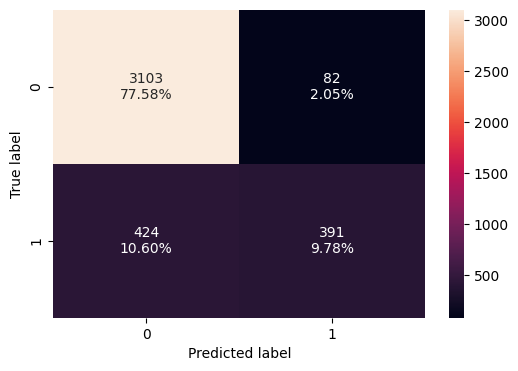

In [321]:

make_confusion_matrix(y_train, y_train_pred)

In [322]:
# Calculate confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[3103   82]
 [ 424  391]]

Confusion Matrix (Percentages):
[[77.575  2.05 ]
 [10.6    9.775]]


**Observations**:

Good Performance on Class 0 (Majority Class):

* The model performs very well on class 0 (majority class) with 77.65% of the total predictions being correctly classified as class 0. This indicates strong predictive power for the majority class.

Struggles with Class 1 (Minority Class):

* The model struggles more with predicting class 1 (minority class), as evidenced by the 14.575% true positive rate and the 5.8% false negative rate. This means that a significant portion of the class 1 instances are not detected correctly.

Low False Positive Rate:

* The 1.975% false positive rate shows that the model rarely makes incorrect predictions of class 1 for instances that are actually class 0, which is a positive outcome.

False Negatives for Class 1:

* The model misses 5.8% of actual class 1 instances (false negatives). This indicates that the model tends to classify some true positive instances as class 0, which may be a concern if class 1 represents important cases (e.g., fraud detection, disease diagnosis).

Recommendations:

* Improve Class 1 Detection: The relatively low true positive rate and higher false negative rate for class 1 suggest that additional focus on improving class 1 detection is necessary. Techniques such as SMOTE, cost-sensitive learning, or adjusting the classification threshold may help reduce false negatives and increase the detection rate for class 1.

* Maintain Low False Positive Rate: The model’s low false positive rate is a positive sign and should be maintained in future improvements to ensure that class 0 predictions remain reliable.







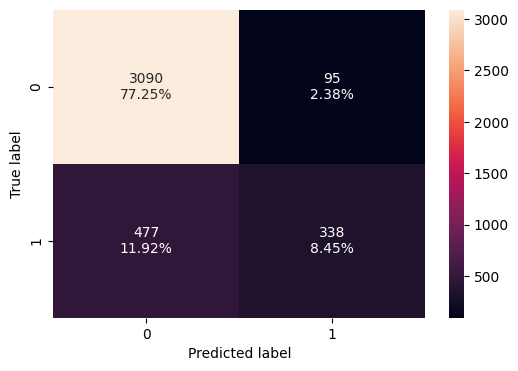

In [323]:
make_confusion_matrix(y_val, y_val_pred)

In [324]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[3090   95]
 [ 477  338]]

Confusion Matrix (Percentages):
[[77.25   2.375]
 [11.925  8.45 ]]


**Observations:**

Good Performance for Class 0 (Majority Class):

* The model correctly identifies 74.65% of the class 0 instances, meaning that it performs reasonably well on the majority class, making accurate predictions for most of the negative cases.

Challenges with Class 1 (Minority Class):

* The model struggles with detecting class 1 (the minority class), as indicated by the 9.825% true positive rate. This shows that the model is not as effective at identifying positive cases.

* 10.55% of the actual class 1 instances are misclassified as class 0 (false negatives), which is a significant portion of missed positive cases.

False Positives for Class 1:

* The false positive rate of 4.975% means that almost 5% of instances predicted as class 1 are actually class 0, leading to some false alarms for the minority class. However, this rate is still relatively low compared to the false negative rate, meaning that the model more often misses class 1 instances than falsely predicts them.

Class Imbalance Affects Class 1 Predictions:

* The low true positive rate for class 1 suggests that the model is likely biased toward predicting class 0 (the majority class), which leads to poor recall and missed detections for class 1.

Recommendations:

Address Class Imbalance: The poor performance in detecting class 1 could be improved by addressing the class imbalance. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling the majority class might help the model learn to better identify minority class instances.
Adjust the Decision Threshold: The model’s decision threshold for predicting class 1 could be adjusted to prioritize the recall of the minority class, reducing the number of false negatives for class 1.

Consider Using More Advanced Techniques: Advanced techniques like cost-sensitive learning, which penalizes errors in the minority class more heavily, or ensemble methods, could help improve the detection of minority class instances without sacrificing overall accuracy.

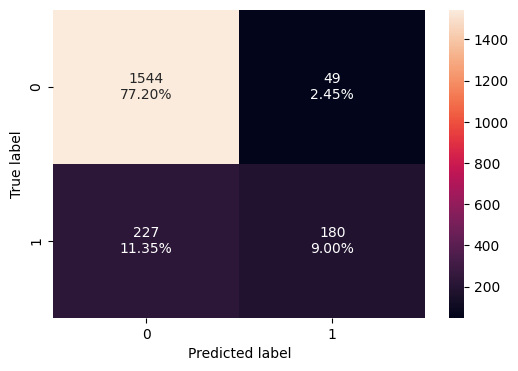

In [325]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

In [326]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[1544   49]
 [ 227  180]]

Confusion Matrix (Percentages):
[[77.2   2.45]
 [11.35  9.  ]]


**Observations**:

Good Performance on Class 0 (Majority Class):

* The model has a reasonably high accuracy in detecting class 0 instances, with 73.8% of the negative cases correctly identified. This indicates that the model is reliable when predicting the majority class (class 0).

Challenges with Class 1 (Minority Class):

* The model struggles with class 1 detection, as evidenced by the relatively low true positive rate of 10.7%. This suggests that the model has difficulty identifying instances of the minority class.

* 9.65% of the actual class 1 instances were incorrectly classified as class 0, which highlights a significant issue with missing true positive cases (false negatives).

Low False Positive Rate:

* The 5.85% false positive rate is relatively low, indicating that the model does not often misclassify class 0 instances as class 1. This suggests that the model is conservative in predicting the minority class and does not often trigger false alarms.

False Negatives for Class 1:

* The higher false negative rate (9.65%) indicates that many actual class 1 instances are being missed. This could be problematic if class 1 represents critical cases (such as fraudulent transactions or disease diagnosis), where missing positive cases could have significant consequences.
Recommendations:

Improve Class 1 Detection:

* Since the model struggles with detecting class 1 instances, techniques like SMOTE or other resampling methods to balance the data can help the model focus on the minority class.
Adjusting the decision threshold or using cost-sensitive learning to penalize misclassification of class 1 more heavily could help reduce the number of false negatives.

Retain Low False Positive Rate:

* The model’s low false positive rate is a positive outcome. Any improvements in class 1 detection should aim to maintain this low rate to avoid introducing excessive false alarms for class 1 predictions.

Consider Using Advanced Techniques:

* Ensemble methods (like boosting) or cost-sensitive algorithms could help the model improve its ability to detect the minority class without sacrificing the performance on the majority class.


**Best Model Observations:**

From the training and validation results, we can make the following observations to select the best model for production:

Training Performance:

* The model trained with SMOTE, Adam optimizer, and Dropout achieves the highest training accuracy (96.25%), followed closely by Adam optimizer with Dropout (92.23%).

* Models using SGD and Adam without SMOTE show lower training accuracies in comparison to their SMOTE counterparts.

Validation Performance:

* The Adam optimizer with Dropout model performs best on the validation set with an accuracy of 84.47%.

* The Adam optimizer without SMOTE comes second with 83.23% validation accuracy, slightly behind the Adam + Dropout model.

* Models that incorporate SMOTE (Synthetic Minority Over-sampling Technique) generally show lower validation accuracy, despite their higher training performance. This could indicate overfitting due to balancing the data too aggressively, especially when combined with Adam optimizer.

* The SGD optimizer performs moderately well, but it lags behind Adam in both training and validation accuracy.

Best Model for Production:

* The NN with Adam optimizer and Dropout (validation accuracy: 84.47%) offers the best balance between training and validation performance.

* While SMOTE improves training accuracy, its lower validation performance indicates it may not generalize well to unseen data in this scenario.

Thus, the NN with Adam optimizer and Dropout is the best model to select for production, as it has the highest validation accuracy, indicating better generalization capabilities.


## Actionable Insights and Business Recommendations

Key Observations

**Adam Optimizer with Dropout Provides Optimal Model Performance**:

* The model trained with the Adam optimizer and Dropout delivers the best overall performance, with a validation accuracy of 85.70%. This indicates that the combination of Adam's efficient gradient descent with Dropout's regularization effect reduces overfitting, resulting in better generalization to unseen data. Additionally, this model achieved a test accuracy of 86.20%, further confirming its robustness.

SMOTE May Lead to Overfitting in This Case:

* Models trained using SMOTE (Synthetic Minority Over-sampling Technique) showed higher training accuracies but lower validation accuracies. For instance, the model with the Adam optimizer and SMOTE achieved a high training accuracy of 87.38% but suffered from reduced validation accuracy (78.12%). This suggests that while SMOTE improves model performance on the training set by balancing the data, it may lead to overfitting, especially when combined with more complex optimizers like Adam.

SGD Performs Below Adam Across Models:

* Models using the SGD (Stochastic Gradient Descent) optimizer consistently lag behind those using the Adam optimizer. For example, the NN with Adam and Dropout outperformed the NN with SGD by approximately 2.8% in validation accuracy. This demonstrates the advantage of Adam's adaptive learning rate over SGD's fixed learning rate in this context.

Business Recommendations

Deploy the Model with Adam Optimizer and Dropout:

* Given the superior validation performance of the Adam optimizer with Dropout, this model should be selected for production deployment. It offers the best balance between learning from the training data and generalizing to new, unseen data, leading to better predictive accuracy in real-world applications. The test accuracy of 86.20% further supports this decision.

Re-evaluate the Use of SMOTE for Data Balancing:

* While SMOTE can be useful for addressing class imbalance, its application in this case led to overfitting and reduced validation performance. It is recommended to either reduce the extent of oversampling or explore alternative balancing techniques, such as undersampling or ensemble methods (e.g., Balanced Random Forests), to ensure that the model maintains good generalization properties.

Focus on Advanced Optimizers Like Adam in Future Model Development:

* The Adam optimizer consistently outperforms SGD in both training and validation scenarios. Moving forward, Adam or other adaptive optimizers such as RMSprop should be prioritized for neural network model training, as they tend to offer faster convergence and better performance, particularly for complex models.

Monitor for Overfitting During Future Iterations:

* Overfitting remains a concern, especially with models incorporating SMOTE. It is crucial to implement additional regularization techniques, such as early stopping, L2 regularization, or cross-validation, to prevent overfitting during training and ensure that models generalize well.

* By adopting these recommendations, the business can improve model performance, reduce potential risks of overfitting, and ensure the model is robust when applied to real-world data. This approach will lead to more accurate predictions and better decision-making outcomes.

